# Analyzing and Predicting the IMDb top 250 Movies from 1996-2020


### John Tayag

<a id="Top_of_page"></a>


*Quick links*

[Data analysis: Movies](#movies)
* [Genre](#genre)
* [Release Date vs IMDb Year](#year)
* [Gross](#gross)
* [Ratings/Score](#ratings)
* [Votes](#votes)

[Data analysis: Actors/Directors](#people)
* [Actors](#actors)
* [Directors](#directors)

[Machine learning](#ML)
* [5 equal-width bins](#5)
* [Top 10-50-100-250](#top10)

# Intro

## Background

[IMDb](#https://www.imdb.com/?ref_=nv_home) (Internet Movie Database) is an online database that lists details on multiple forms of visual media, most notably films and TV shows, and hosts millions of users. The details listed include casts, production crew, and plot summaries, as well as both critical reviews and user ratings. Using this information, IMDb maintains a list of the highest rated 250 movies updated constantly as new reviews are submitted.

Using a dataset uploaded by Mustafa Cicek on Kaggle, I would like to analyze the top 250 movies over the years to try answer a few questions:

* What features make a popular movie?
* How have movies changed over the years?
* Which actors and directors have had the most success over the years?

I will also build a model to try and predict whether or not a movie a movie will be considered popular (as in, how high on the list will the movie be ranked?). I will detail this further in the machine learning section.


## Dataset

[Link to the dataset](#https://www.kaggle.com/mustafacicek/imdb-top-250-lists-1996-2020)

The dataset was compiled and uploaded by Mustafa Cicek from Kaggle, and the information was scraped from IMDb using Beautiful Soup. As the top 250 list is constantly changing, the data from each year was extracted at midnight of December 31st (PST) to reflect the final rankings of that year.

There are 6250 rows (25 years of top 250 movies), and there are 16 features:

1. **Ranking**: The ranking of a movie in a given year
2. **IMDbyear**: The year for a given Top 250 list
3. **IMDBlink**: The movie's IMDb url
4. **Title**: Title of the movie
5. **Date**: Movie's release date
6. **RunTime**: Total runtime of the movie (in minutes)
7. **Genre**: Different genres the movie flls under
8. **Rating**: The IMDb score of the movie - a weighted average of IMDb user ratings
9. **Score**: The metascore of the movie - a weighted average of professional critical reviews
10. **Votes**: Total # of votes on IMDb for a movie
11. **Gross**: Total gross of a movie (in millions of dollars)
12. **Director**: Director of the movie
13. **Cast1**: Performer 1 for a movie
14. **Cast2**: Performer 2 for a movie
15. **Cast3**: Performer 3 for a movie
16. **Cast4**: Performer 4 for a movie

While individual user preferences and movie qualities may differ greatly, these features are broad enough to allow for a relatively non-biased analysis.

# Data Analysis

## Movies

<a id='movies'></a>

First, I will visualize some key features to try to understand the data:

For each year, find the top 5 movie genres
Overall, find the top 5 movie genres



In [2]:
### View the original data frame

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

imdb_df = pd.read_csv("imdbTop250.csv")

imdb_df.head()

,Ranking,IMDByear,IMDBlink,Title,Date,RunTime,Genre,Rating,Score,Votes,Gross,Director,Cast1,Cast2,Cast3,Cast4
0,1,1996,/title/tt0076759/,Star Wars,1977,121,"Action, Adventure, Fantasy",8.6,90.0,1254781,322.74,George Lucas,Mark Hamill,Harrison Ford,Carrie Fisher,Alec Guinness
1,2,1996,/title/tt0111161/,The Shawshank Redemption,1994,142,Drama,9.3,80.0,2407245,28.34,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
2,3,1996,/title/tt0117951/,Trainspotting,1996,93,Drama,8.1,83.0,645186,16.50,Danny Boyle,Ewan McGregor,Ewen Bremner,Jonny Lee Miller,Kevin McKidd
3,4,1996,/title/tt0114814/,The Usual Suspects,1995,106,"Crime, Mystery, Thriller",8.5,77.0,1010775,23.34,Bryan Singer,Kevin Spacey,Gabriel Byrne,Chazz Palminteri,Stephen Baldwin
4,5,1996,/title/tt0108598/,The Wrong Trousers,1993,30,"Animation, Short, Comedy",8.3,NaN,51747,NaN,Nick Park,Peter Sallis,Peter Hawkins,NaN,NaN


In [3]:
### Quick look at various statistics
imdb_df.describe()

,Ranking,IMDByear,Date,RunTime,Rating,Score,Votes,Gross
count,6250.00000,6250.00000,6250.000000,6250.000000,6250.000000,5399.000000,6.250000e+03,5465.000000
mean,125.50000,2008.00000,1978.313120,125.507200,8.167728,84.304316,4.615469e+05,70.185208
std,72.17398,7.21168,23.509933,30.899116,0.329375,10.060331,4.533022e+05,101.989895
min,1.00000,1996.00000,1920.000000,16.000000,5.500000,61.000000,8.906000e+03,0.010000
25%,63.00000,2002.00000,1959.000000,105.000000,8.000000,77.000000,1.141480e+05,5.380000
50%,125.50000,2008.00000,1983.000000,121.000000,8.100000,85.000000,2.881270e+05,26.240000
75%,188.00000,2014.00000,1998.000000,138.000000,8.300000,92.000000,7.076660e+05,90.140000
max,250.00000,2020.00000,2020.000000,321.000000,9.300000,100.000000,2.407245e+06,936.660000


**Important values to note:**

* There are missing values in the **score** (5399/6250) and the **gross** (5465/6250) columns.
    * These are only the numeric columns so there could be more missing values in other columns
* The average release date is **1978** with a standard deviation of **23.5 years**. Considering how the data covers IMDb rankings from 1980-2020, this reveals that many movies on each list were released prior to the year they were ranked.
    * Notably the earliest movie was released in 1920.
* Average movie earnings vary wildly, from the lowest at **\\$10,000** to the highest at **\\$936.66 million**.
* Average vote counts also vary wildly, from the lowest at **8906** to the highest at **2,407,245**.

In [4]:
### Quick look at the data types of each column
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6250 entries, 0 to 6249
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ranking   6250 non-null   int64  
 1   IMDByear  6250 non-null   int64  
 2   IMDBlink  6250 non-null   object 
 3   Title     6250 non-null   object 
 4   Date      6250 non-null   int64  
 5   RunTime   6250 non-null   int64  
 6   Genre     6250 non-null   object 
 7   Rating    6250 non-null   float64
 8   Score     5399 non-null   float64
 9   Votes     6250 non-null   int64  
 10  Gross     5465 non-null   float64
 11  Director  6250 non-null   object 
 12  Cast1     6250 non-null   object 
 13  Cast2     6250 non-null   object 
 14  Cast3     6242 non-null   object 
 15  Cast4     6242 non-null   object 
dtypes: float64(3), int64(5), object(8)
memory usage: 781.4+ KB


In [5]:
### Number of unique values
imdb_df.nunique()

Ranking     250
IMDByear     25
IMDBlink    733
Title       732
Date        100
RunTime     140
Genre       197
Rating       31
Score        40
Votes       733
Gross       583
Director    428
Cast1       477
Cast2       623
Cast3       656
Cast4       690
dtype: int64

**Important values to note**

* There are 732 movies out of 6250 total instances, meaning there are **many** repeat movies.
* There are 100 unique dates, meaning these movies span an entire century.
* There are 477 Cast1 values, a much smaller set than all other Cast categories
    * Cast1 will likely be a better predictor of a good movie than the other cast categories as there are less values that divide the data

<a id="genre"></a>

## **Genre**

* There are 197 genre values in the data, but many instances have multiple genres tagged in this category
    * For example, the movie Star Wars is listed as "Action, Adventure, Fantasy" as a combined genre category
    * This means "Drama" is classed differently from "Drama, Fantasy", and "Drama, Fantasy, Action"
* For a more accurate distribution of genres, I split each combined genre into its respective sub-categories


In [6]:
### Example of a movie with a combined genre value
print('Star Wars is listed as', list(imdb_df[ imdb_df['Title'] == 'Star Wars'].head(1)['Genre']) )

Star Wars is listed as ['Action, Adventure, Fantasy']


In [7]:
### Create function that counts how many times an item appears in the data frame

def split_store_unique(input_df, colname, sep):
    #For a column where the genre values consist of 1 OR MORE items, this function will parse through all values and save
    #the individual values with the number of times each are called out individually
    #
    #Output is a DF where each value is stored  with the # of times it appears in the original column individually
    
    
    # Initialize dictionary of genre values for output (col_dict)
    # Extract all values from the genre column (col_vals)
    col_dict = {}
    col_vals = list(input_df[colname])
    
    # Loop through all genre combinations, split into individual values, strip white spaces, then add to output dictionary
    for instance in col_vals:
        instance = instance.split(sep)
        
        for value in instance:
            value = value.lstrip()
            value = value.rstrip()
            col_dict[value] = col_dict.get(value, 0) + 1
    
    # Create output data frame from the dictionary
    output_df = pd.DataFrame(col_dict.items())
    
    # Format the output data frame accordingly, then return the output data frame
    output_df.rename(columns = {0: colname, 1: 'Count'}, inplace = True)
    output_df.sort_values('Count', ascending = False, inplace = True)
    output_df = output_df.reset_index().drop(columns = 'index', axis=1)
    
    return output_df

In [8]:
### Finding number of unique genre categories from the genre column
genre_df = split_store_unique(imdb_df, 'Genre', ', ')

total_genre_num = genre_df['Genre'].nunique()
genre_list = genre_df['Genre'].copy()

# Print the number of genres and display the last 13
print('There are {} different movie genres. These are the bottom {} genres:'.format(total_genre_num, total_genre_num - 10))

genre_df.tail(total_genre_num - 10)

There are 23 different movie genres. These are the bottom 13 genres:


,Genre,Count
10,War,452
11,Fantasy,443
12,History,385
13,Animation,353
14,Family,286
15,Film-Noir,235
16,Western,209
17,Horror,186
18,Sport,119
19,Music,102


In [9]:
### Print the top 10 genres represented in the data frame
print('These are the top 10 genres')
genre_df.head(10)

These are the top 10 genres


,Genre,Count
0,Drama,4309
1,Crime,1380
2,Adventure,1281
3,Comedy,1250
4,Action,938
5,Thriller,937
6,Romance,794
7,Mystery,783
8,Biography,605
9,Sci-Fi,511


There are **23** different movie genres represented in the data

The most common movie genre is **Drama** with a whopping **4309 movies** on all top 240 lists, followed by Crime (1380), Adventure (1281), and Comedy (1250).

The least common movie genre is **Documentary** with only **2 movies**, followed by Short (14), Musical (71), and Music (102).

Note, however, that this only reflects the prevalence of each category individually - many movies on the list are of a combination of genres

Text(0.5, 0, '# of associated movies')

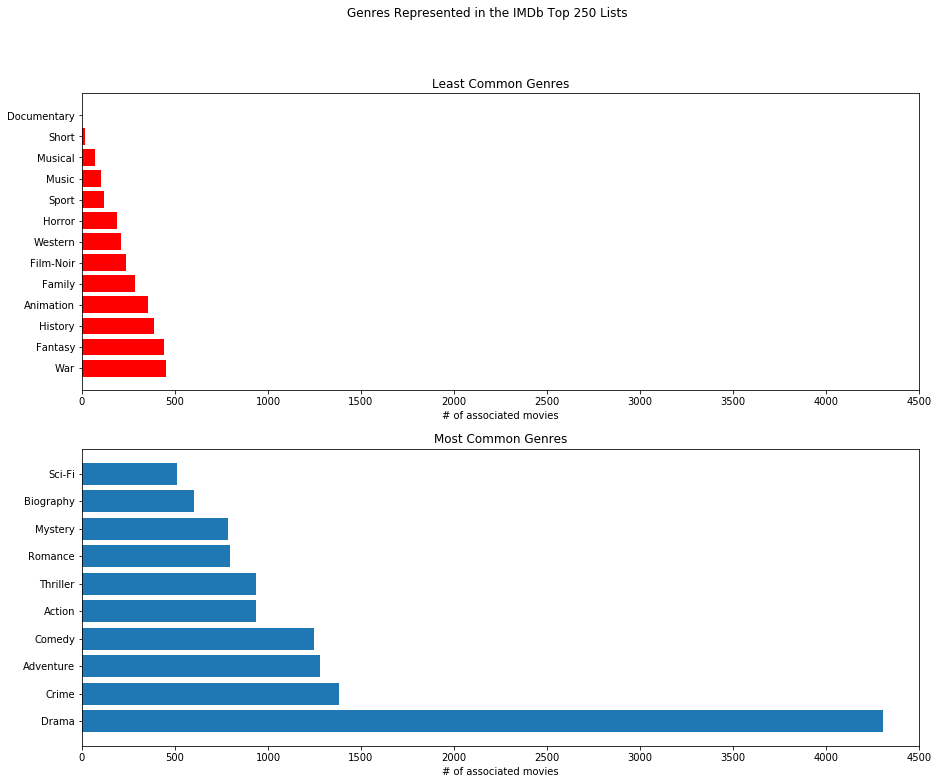

In [10]:
### Plot bar charts of the most/least common genre categories

genre_high = genre_df.head(10)
genre_low = genre_df.tail(total_genre_num - 10)
genre_top = genre_df[genre_df['Count'] == genre_df.nlargest(1, 'Count') ] 

f, (ax1, ax2) = plt.subplots(2, 1)

ax2.barh(list(genre_high['Genre']), list(genre_high['Count']) )
ax1.barh(list(genre_low['Genre']), list(genre_low['Count']), color = 'r' )
        
f.set_figwidth(15)
f.set_figheight(12)

ax1.set_xlim(0, 4500)
ax2.set_xlim(0,4500)
plt.suptitle('Genres Represented in the IMDb Top 250 Lists')
ax1.set_title('Least Common Genres')
ax2.set_title('Most Common Genres')
ax1.set_xlabel('# of associated movies')
ax2.set_xlabel('# of associated movies')
#ax1.legend()

#f.savefig('Least_Most_Genres_in_Top250')

The following chart shows the genre breakdown for the top 10 movies across all top 250 lists in the data

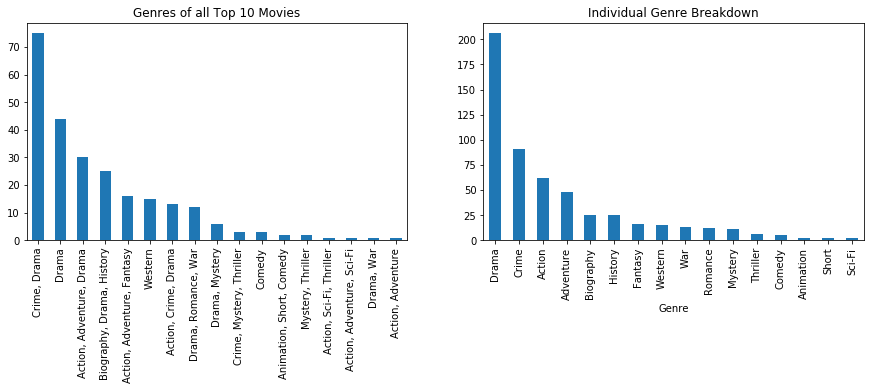

In [11]:
### Similar code to above, except using Pandas to plot the bars instead of matplotlib

# Finding the genres represented in all top 10 movies without duplicates
imdb_top10s = imdb_df[ imdb_df['Ranking'] < 11].drop_duplicates()
genre = imdb_top10s['Genre']

# Finding the individual genre distribution
genre_temp = split_store_unique(imdb_top10s, 'Genre', ', ')
genre_individual = pd.Series(data = genre_temp.Count.values, index = genre_temp.Genre)

f, axes = plt.subplots(1,2)

f.set_figwidth(15)
genre.value_counts().plot(kind = 'bar', ax=axes[0], title = 'Genres of all Top 10 Movies')
genre_individual.plot(kind = 'bar', ax=axes[1], title = 'Individual Genre Breakdown')

#f.savefig('Top10_Genres_Individual_Breakdown')

### What genres make a popular movie?

Clearly, drama movies dominate the charts being represented by over 4000 movies on the IMDb top 250 movies in the dataset. This trend is also reflected when looking specifically at only the top 10 movies. **Crime dramas** are particularly popular with over 70 movies out of a total of 250, but over 40 specifically **drama** movies are also included. When looking at the individual genre breakdown, **drama** once again dominates with over 200 movies, though **crime** also has a significant share with almost 100 movies. 

**Action** and **Adventure** movies are the next most popular movie genres overall. While **Comedy** movies are highly represented in the top 250 lists, they are among the least represented in the top 10 lists, implying that comedies rarely outrank the other popular movie genres overall.

## Genres over time

To get a sense of how popular movie genre preferences have changed over time, I will plot the 10 most common genres each year, first as percentages of the total each year, and second as the totals themselves.

In [12]:
### Get and plot the top num genres represented each year
num = 10 # How many genres to keep from each year
stack_genre = pd.DataFrame() # DF of genres from each year
stack_count = pd.DataFrame() # DF of respective genre counts from each year
genres_topnumset = set() # Keeping track of all genres that made the top 10 from any given year


# For each year, store the top 10 most common genres and respective counts
for year in range(1996,2021):
    # Finding number of unique genre categories
    year_df = imdb_df[ imdb_df['IMDByear'] == year ]
    
    yearly_genre_df = split_store_unique(year_df, 'Genre', ',')

    genrenum = yearly_genre_df.loc[0:num-1, 'Genre']
    countnum = yearly_genre_df.loc[0:num-1, 'Count']

    genres_topnumset.update(set(genrenum))

    stack_genre[str(year)] = genrenum
    stack_count[str(year)] = countnum

# Form dataframe with genre as column names, year as indices, counts as datapoints
genres_topnum = list(genres_topnumset)
yearly_genres = pd.DataFrame()
years = range(1996,2021)
#genre_row = pd.Series()

# Loop through all genres that made the top 10 in any given year
for i, genre in enumerate(genres_topnum):
    genre_row = list()

    # Loop through all years in the data set, then add the count from that year to the genre's column
    for year in years:
        countval = list(stack_count.loc[ stack_genre[str(year)] == genre, str(year)])

        if len(countval) == 0: # If genre was not in the top 10 of a given year, default to 0
            countval = 0

        else:
            countval = countval.pop()

        genre_row.append(countval)

    yearly_genres[str(genre)] = genre_row

yearly_genres['Years'] = years
yearly_genres.set_index('Years', inplace=True)
print('These are the top {} genres represented in each year\'s top 250 with the number of associated movies'.format(num))

yearly_genres

These are the top 10 genres represented in each year's top 250 with the number of associated movies


,Mystery,Sci-Fi,Comedy,Crime,Biography,Drama,Animation,Romance,Action,War,Fantasy,Adventure,Thriller
Years,,,,,,,,,,,,,
1996,20,23,81,48,0,162,0,49,36,0,24,43,32
1997,26,0,70,55,30,167,0,40,31,0,19,45,38
1998,26,0,71,58,29,171,0,40,28,0,16,43,34
1999,29,0,62,52,27,172,0,34,27,20,0,40,32
2000,26,0,63,50,25,172,0,35,29,20,0,42,33
2001,28,0,58,49,23,171,0,37,30,19,0,47,40
2002,32,0,57,53,24,168,0,34,32,20,0,48,40
2003,35,0,54,53,24,164,0,32,35,20,0,50,41
2004,32,0,54,53,23,172,0,35,35,19,0,52,38


Text(0.5, 1.0, 'The 10 Most Prevalent Movie Genres Each Year From 1980-2020')

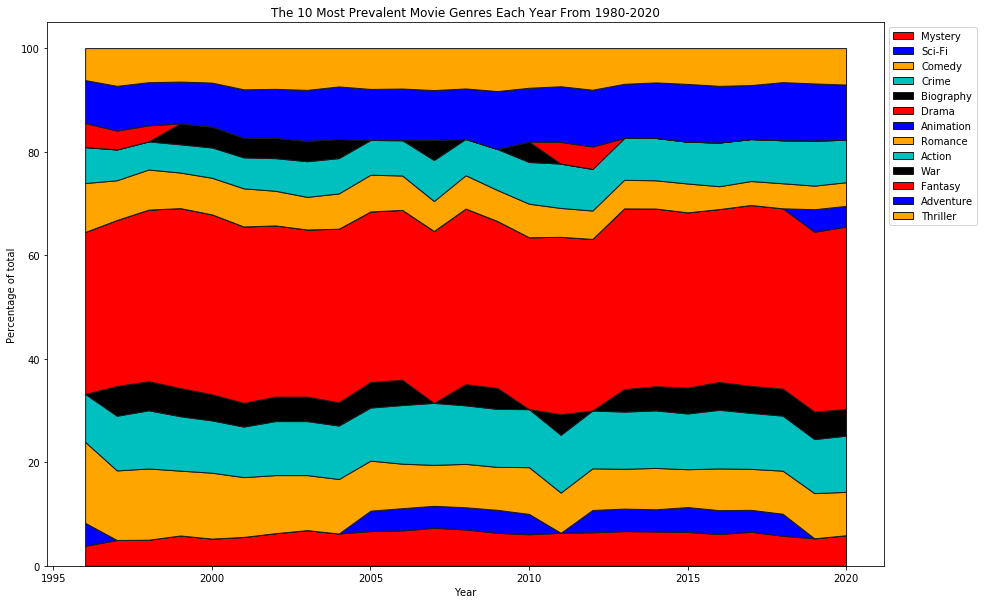

In [13]:
### Plot the top 10 genres for each year with respective percentages
fig = plt.figure(figsize = (15, 10))
colors = ['r', 'b', 'orange', 'c', 'k']
labels = genres_topnum
a = yearly_genres.copy()
a_percent = ( a.T / a.T.sum() ) * 100

plt.stackplot(years, a_percent, colors=colors, labels=labels, edgecolor = '.1')

plt.legend(bbox_to_anchor = (1.0, 1.0), loc = 'upper left')
plt.xlabel('Year')
plt.ylabel('Percentage of total')
plt.title('The {} Most Prevalent Movie Genres Each Year From 1980-2020'.format(num))

#fig.savefig('20_most_prevalent_movie_genres')

### Important things to note:

* By far, **Drama** is the largest, most consistently present genre throughout the years
    * **Crime, Thriller, Adventure, Comedy,** and **Action** also have a consistent presence
    ** Mystery, Biography, and Romance movies have a smaller but also fairly consistent presence
* A few genres are not consistently present:
    * War movies appeared around the 2000s but have since been less frequent on the list
    * There was a bried period of fantasy movies in the early 2010s
    * The first animation movies to appear on the list were in the late 2010s
    * Sci-Fi movies didn't make the list between 1996 and 2004, but have since appeared frequently
    

Text(0.5, 1.0, 'The 10 Most Prevalent Movie Genres in New Movies Each Year From 1980-2020')

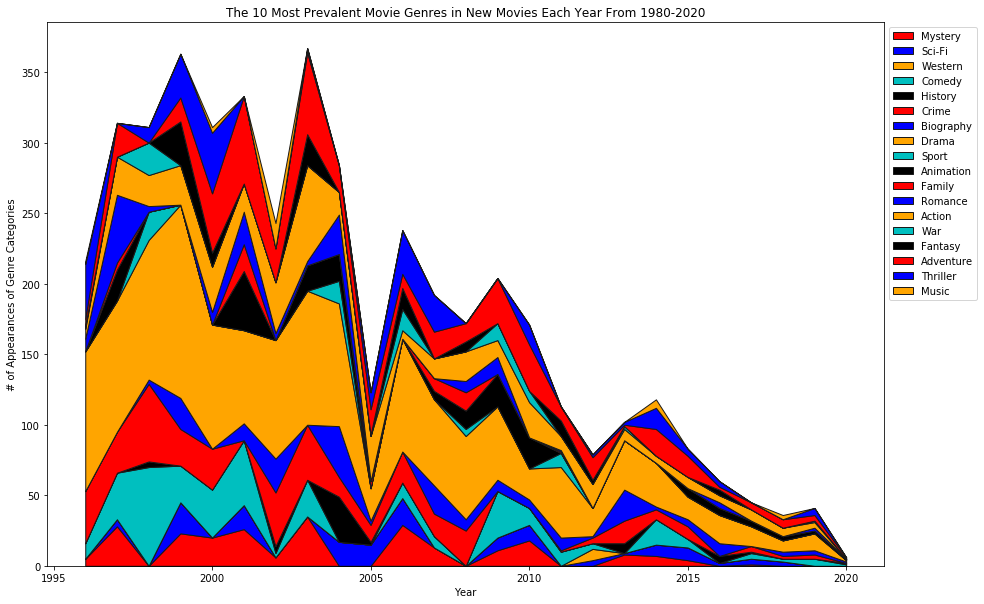

In [14]:
# CODE IS THE SAME EXCEPT FOR ADDING A FILTER FOR RELEASE DATE AND NOT CONVERTING a TO PERCENTAGES
num = 10
stack_genre = pd.DataFrame()
stack_count = pd.DataFrame()
genres_topnumset = set()

for year in range(1996,2021):
    # Finding number of unique genre categories
    year_df = imdb_df[ imdb_df['IMDByear'] == year ]
    year_df = imdb_df[imdb_df['Date'] == year] #########################
    
    yearly_genre_df = split_store_unique(year_df, 'Genre', ',')

    genrenum = yearly_genre_df.loc[0:num-1, 'Genre']
    countnum = yearly_genre_df.loc[0:num-1, 'Count']

    genres_topnumset.update(set(genrenum))

    stack_genre[str(year)] = genrenum
    stack_count[str(year)] = countnum


# Form dataframe with genre as column names, year as indices, counts as datapoints
genres_topnum = list(genres_topnumset)
yearly_genres = pd.DataFrame()
years = range(1996,2021)
#genre_row = pd.Series()

for i, genre in enumerate(genres_topnum):
    genre_row = list()

    for year in years:
        countval = list(stack_count.loc[ stack_genre[str(year)] == genre, str(year)])

        if len(countval) == 0:
            countval = 0

        else:
            countval = countval.pop()

        genre_row.append(countval)

    yearly_genres[str(genre)] = genre_row

yearly_genres['Years'] = years
yearly_genres.set_index('Years', inplace=True)

fig = plt.figure(figsize = (15, 10))
colors = ['r', 'b', 'orange', 'c', 'k']
labels = genres_topnum
a = yearly_genres.copy()
#a_percent = ( a.T / a.T.sum() ) * 100

plt.stackplot(years, a.T, colors=colors, labels=labels, edgecolor = '.1')

plt.legend(bbox_to_anchor = (1.0, 1.0), loc = 'upper left')
plt.xlabel('Year')
plt.ylabel('# of Appearances of Genre Categories')
plt.title('The {} Most Prevalent Movie Genres in New Movies Each Year From 1980-2020'.format(num))

#fig.savefig('Most_Prevalent_5_genres')

### Important things to note:

This chart is harder to understand, but essentially it plots the 10 most prevalent movie genres each yearas totals instead of percentages. I will explore this next, but the plot indicates that there are less new movies contributing to the genre count with each passing year, implying that there are less new movies appearing on the IMDb list each year.

<a id='year'></a>
## Release Date vs IMDb Year

This analysis will give an idea of how many new movies are making the IMDb top 250 lists versus old movies

Year with most new movies:
1996 with 23 new movies on the IMDb top 250


Year with least new movies:
2002 with 4 new movies on the IMDb top 250


2020 had only 2 new movies on the IMDb top 250


Text(0, 0.5, '# of Movies')

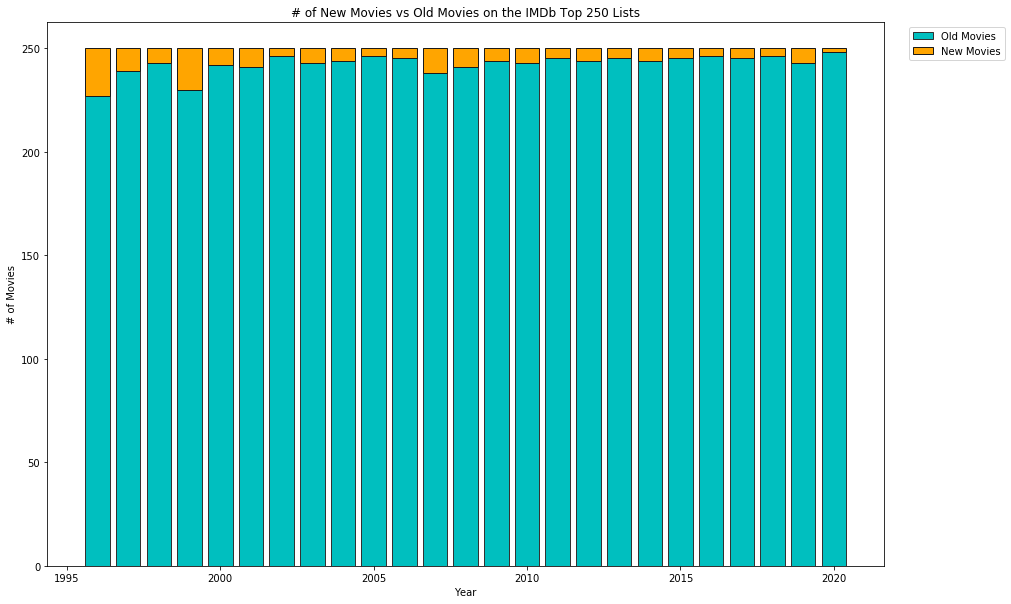

In [15]:
### Find the number of new movies that made the top 250 for each year

# Extract the IMDByear and Date columns --> If Date = IMDByear, then the movie was released that year
date_df = imdb_df[['IMDByear', 'Date']]

# Set up the chart to plot using the for loop
fig = plt.figure(figsize = (15, 10))
labels = ['Old Movies', 'New Movies']
current_tracker = list() # The number of new movies for each year
year_list = range(1996, 2021)

# Loop through each year
for year in year_list:
    # Extract the data for the given year
    yearly_date_df = date_df[ date_df['IMDByear'] == year].reset_index().drop(columns = 'index', axis=1)
    #print(yearly_date_df.head())
    
    # Sum up the number of movies newly released for the given year
    current = sum(yearly_date_df[ yearly_date_df['IMDByear'] == yearly_date_df['Date']]['Date'].value_counts())
    current_tracker.append(current)
    
    # Sum up the number of movies previously released for the given year
    past = sum(yearly_date_df[ yearly_date_df['IMDByear'] != yearly_date_df['Date']]['Date'].value_counts())
    
    # Plot both new and old movies for the given year
    plt.bar(year, past, color = 'c', edgecolor = '.2')
    plt.bar(year, current, bottom = past, color = 'orange', edgecolor = '.1')

# Record the index of the year with the most new releases and extract the year
current_max = max(current_tracker)
current_max_year = year_list[current_tracker.index(current_max)]

# Record the index of the year with the least new releases and extract the year
# Not including 2020 as COVID impacted the industry heavily that year (call out its value separately)
current_min = min(current_tracker[0:len(current_tracker)-1])
current_min_year = year_list[current_tracker.index(current_min)]

print('Year with most new movies:\n{} with {} new movies on the IMDb top 250'.format(current_max_year, current_max))
print('\n')
print('Year with least new movies:\n{} with {} new movies on the IMDb top 250'.format(current_min_year, current_min))
print('\n')
print('2020 had only {} new movies on the IMDb top 250'.format(current_tracker[len(current_tracker)-1]))

plt.legend(labels = labels, loc = 'upper right', bbox_to_anchor = (1.15,1))
plt.title('# of New Movies vs Old Movies on the IMDb Top 250 Lists')
plt.xlabel('Year')
plt.ylabel('# of Movies')

#fig.savefig('new_vs_old_movies')

### Analysis

There is a definite downward trend of the number of new movies appearing on yearly IMDb Top 250 lists as time passes. **1996** had the most with **23** new movies, while **2002** had the least with only **4** (excluding 2020).

**2020** actually had the least with only **2** new movies on the IMDb top 250 list, but considering the COVID-19 pandemic's impact on the movie industry during that year, this number may have been affected. There is a notable jump in the number of new movies in 2019, so maybe this trend would have started reversing.

<a id="gross"></a>

## Gross

I will compare some of the highest grossing movies to some of the lowest grossing movies. I will use the mean grossing overall to aid in this comparison, so first I will drop any movies with a missing Gross value.

In [16]:
# Checking for NA values in the Gross column
gross_na = imdb_df[imdb_df['Gross'].isnull() == True]
print('These movies have N/A Gross values - there are {} total'.format(gross_na.shape[0]))
gross_na

These movies have N/A Gross values - there are 785 total


,Ranking,IMDByear,IMDBlink,Title,Date,RunTime,Genre,Rating,Score,Votes,Gross,Director,Cast1,Cast2,Cast3,Cast4
4,5,1996,/title/tt0108598/,The Wrong Trousers,1993,30,"Animation, Short, Comedy",8.3,NaN,51747,NaN,Nick Park,Peter Sallis,Peter Hawkins,NaN,NaN
5,6,1996,/title/tt0112691/,A Close Shave,1995,30,"Animation, Short, Comedy",8.1,NaN,39406,NaN,Nick Park,Peter Sallis,Anne Reid,Justin Fletcher,Peter Hawkins
46,47,1996,/title/tt0038650/,It's a Wonderful Life,1946,130,"Drama, Family, Fantasy",8.6,89.0,413782,NaN,Frank Capra,James Stewart,Donna Reed,Lionel Barrymore,Thomas Mitchell
50,51,1996,/title/tt0056592/,To Kill a Mockingbird,1962,129,"Crime, Drama",8.3,88.0,298445,NaN,Robert Mulligan,Gregory Peck,John Megna,Frank Overton,Rosemary Murphy
79,80,1996,/title/tt0097202/,Dip huet seung hung,1989,111,"Action, Crime, Drama",7.8,82.0,46229,NaN,John Woo,Chow Yun-Fat,Danny Lee,Sally Yeh,Kong Chu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6221,222,2020,/title/tt0046268/,Le salaire de la peur,1953,131,"Adventure, Drama, Thriller",8.1,85.0,56136,NaN,Henri-Georges Clouzot,Yves Montand,Charles Vanel,Peter van Eyck,Folco Lulli
6223,224,2020,/title/tt0053198/,Les quatre cents coups,1959,99,"Crime, Drama",8.1,NaN,108435,NaN,François Truffaut,Jean-Pierre Léaud,Albert Rémy,Claire Maurier,Guy Decomble
6231,232,2020,/title/tt1954470/,Gangs of Wasseypur,2012,321,"Action, Comedy, Crime",8.2,89.0,86365,NaN,Anurag Kashyap,Manoj Bajpayee,Richa Chadha,Nawazuddin Siddiqui,Tigmanshu Dhulia
6234,235,2020,/title/tt6148156/,Vikram Vedha,2017,147,"Action, Crime, Drama",8.4,NaN,31347,NaN,"Gayatri, Pushkar",Madhavan,Vijay Sethupathi,Shraddha Srinath,Kathir


Average gross: $70.19 million


Text(0.5, 1.0, 'Highest Grossing Movies on the IMDb Top 250 Lists')

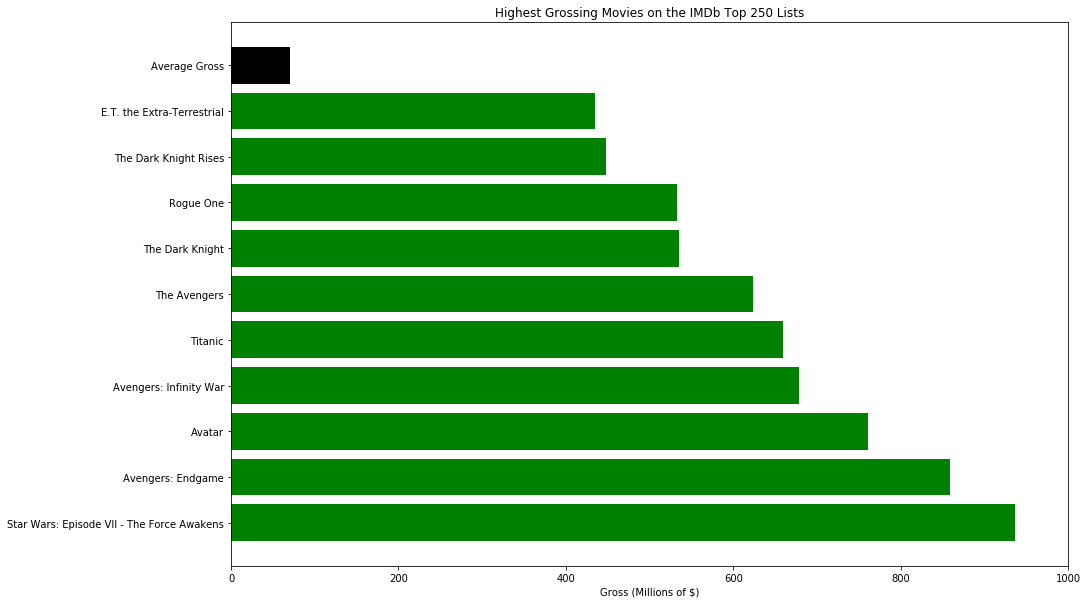

In [17]:
# Remove all rows with N/A Gross values
gross_imdb = imdb_df[imdb_df['Gross'].isnull() == False]
mean_gross = gross_imdb['Gross'].mean() # Average gross for all movies

# Record the highest grossing movies
gross_high = gross_imdb.drop_duplicates('Title').nlargest(10,'Gross')
gross_high_x = list(gross_high['Title'])
gross_high_y = list(gross_high['Gross'])

# Record the lowest grossing movies
gross_low = gross_imdb.drop_duplicates('Title').nsmallest(10,'Gross')
gross_low_x = list(gross_low['Title'])
gross_low_y = list(gross_low['Gross'])

# Print the average gross
print('Average gross: ${} million'.format(round(mean_gross, 2)) )

# Plot the highest grossing movies with the average gross in black
fig = plt.figure(figsize=(15,10))
plt.barh(gross_high_x, gross_high_y, color = 'g')
plt.barh('Average Gross', mean_gross, color='k')

plt.xlim(0,1000)
plt.xlabel('Gross (Millions of $)')
plt.title('Highest Grossing Movies on the IMDb Top 250 Lists')

#fig.savefig('highest_grossing_movies')

Average gross: $70.19 million


Text(0.5, 1.0, 'Lowest Grossing Movies on the IMDb Top 250 Lists')

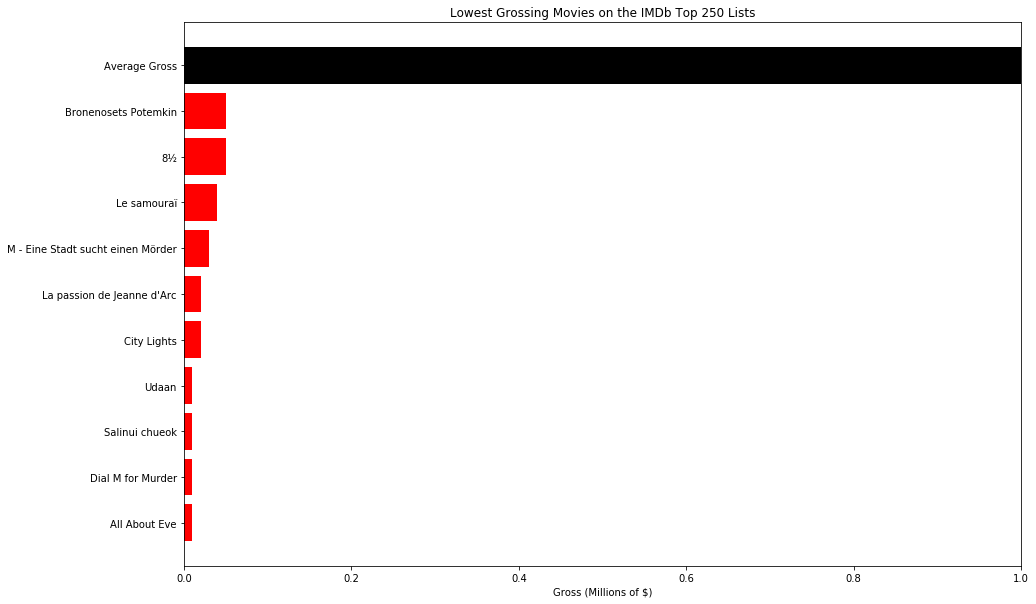

In [18]:
# Print the average gross
print('Average gross: ${} million'.format(round(mean_gross, 2)) )

# Plot the lowest grossing movies with the average gross in black
fig = plt.figure(figsize=(15,10))

f = plt.barh(gross_low_x, gross_low_y, color = 'r')
plt.barh('Average Gross', mean_gross, color='k')

plt.xlim(0,1)
plt.xlabel('Gross (Millions of $)')
plt.title('Lowest Grossing Movies on the IMDb Top 250 Lists')

#fig.savefig('lowest_grossing_movies')

The highest grossing movies include some of the most major modern movies, including **Star Wars: The Force Awakens**, **Avengers: Endgame**, and **Avatar**. All three of these movies broke the *\\$700 million* mark. The lowest grossing movies are much smaller in scale and don't come even close to breaking the *\\$1 million* mark. These include some small films such as **All About Eve** and **Dial M for Murder**, as well as some foreigh films like **Udaan** and **Le samourai**.

The average gross was about *\\$70 million* - notably, this bar extends well beyond any useful range on the lowest grossing movie chart.

To see how much of an impact the gross value has on the ranking, I will these same movies against their corresponding rankings.

The lowest grossing movies (in <font color='red'>red</font>) were fairly uniformly spread across the entire 250 list while the the highest grossing movies (in <font color='blue'>blue</font>) were mostly located in the top 100 range. The average low gross movie ranked around 130th while the average high gross movie ranked around 76th.

This trend is pretty clear across all movies:

Average low-gross movie ranking:  129
Average high-gross movie ranking:  76


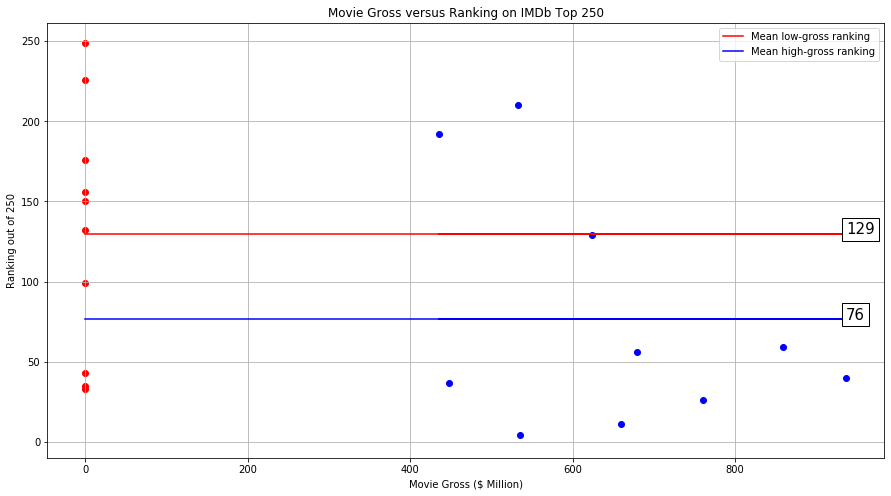

In [105]:
# Compare the best rank for both the top 10 and bottom 10 grossing movies
# IMPORTANT: Get the "lowest" rank for each movie (some movies made the top 250 several times at different rankings)
### Remember: Lower ranking is BETTER (#1 vs #250)

# List of both top 10 and bottom 10 movies
movielist = gross_high_x + gross_low_x
# Initialize data frame 
gross_allrank = pd.DataFrame()

for movie in movielist:
    gross_movie_rank = gross_imdb[gross_imdb['Title'] == movie]
    gross_movie_rank = gross_movie_rank[gross_movie_rank['Ranking'] == gross_movie_rank['Ranking'].min()].head(1)
    # head(1) ensures only one entry if a movie has several instances of its best ranking

    gross_allrank = pd.concat( [gross_allrank, gross_movie_rank])

# Split data into low grossing and high grossing
lowgross_allrank = gross_allrank[ gross_allrank['Gross'] < 1]
highgross_allrank = gross_allrank[ gross_allrank['Gross'] > 1]

# Get horizontal lines at the average rankings
avglowrank = lowgross_allrank['Ranking'].mean()
avghighrank = highgross_allrank['Ranking'].mean()

# Values for the plot
xvalues = list(lowgross_allrank['Gross']) + list(highgross_allrank['Gross'])
avglowrank_arr = np.ones((len(xvalues),1)) * avglowrank
avghighrank_arr = np.ones((len(xvalues),1)) * avghighrank
labels = ['Mean low-gross ranking', 'Mean high-gross ranking']
print('Average low-gross movie ranking: ', int(avglowrank))
print('Average high-gross movie ranking: ', int(avghighrank))

# Scatterplot, x axis is gross, y axis is rank
fig = plt.figure(figsize=(15,8))
box = dict(facecolor = 'white')

plt.scatter(lowgross_allrank['Gross'], lowgross_allrank['Ranking'], color = 'r')
plt.scatter(highgross_allrank['Gross'], highgross_allrank['Ranking'], color = 'b')
plt.plot(xvalues, avglowrank_arr, 'r', label = labels[0])
plt.plot(xvalues, avghighrank_arr, 'b', label = labels[1])
plt.text(highgross_allrank['Gross'].max(), avglowrank_arr[len(avglowrank_arr) - 1], int(avglowrank), fontsize = 15,
        bbox = box)
plt.text(highgross_allrank['Gross'].max(), avghighrank_arr[len(avghighrank_arr) - 1], int(avghighrank), fontsize = 15,
        bbox = box)
plt.xlabel('Movie Gross (\\$ Million)')
plt.ylabel('Ranking out of 250')
plt.title('Movie Gross versus Ranking on IMDb Top 250')
plt.legend()
plt.grid()

#fig.savefig('Top10_Movie_gross_compare_low_vs_high')


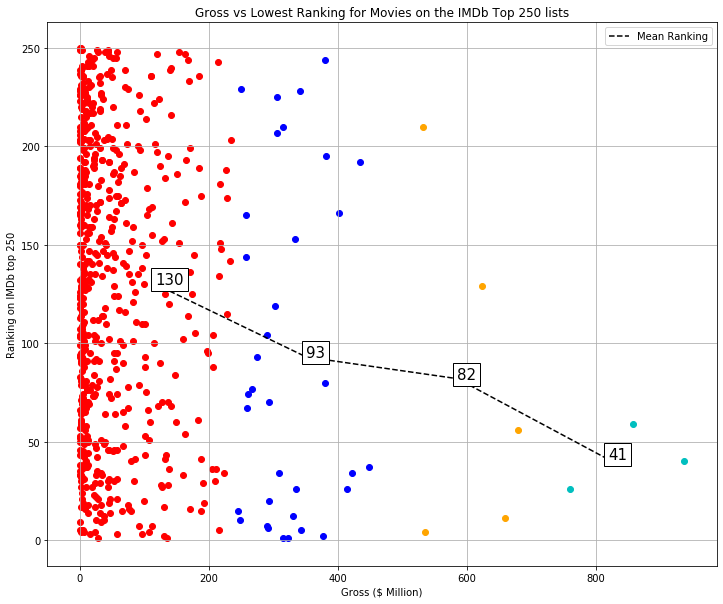

In [20]:
# Plotting average rankings for different gross categories (Binned categories according to gross)

# List all movies
movielist = list(gross_imdb['Title'].drop_duplicates())
# Initialize data frame 
gross_all = pd.DataFrame()

for movie in movielist:
    gross_movie_rank = gross_imdb[gross_imdb['Title'] == movie]
    gross_movie_rank = gross_movie_rank[gross_movie_rank['Ranking'] == gross_movie_rank['Ranking'].min()].head(1)
    # head(1) ensures only one entry if a movie has several instances of its lowest ranking
    
    gross_all = pd.concat( [gross_all, gross_movie_rank])

gross_all.sort_values('Gross', inplace = True)

# Bin the movies into sets according to Gross total (equal divisions on Gross axis)   
bin_num = 4
bin_divisions = np.linspace(0, gross_all['Gross'].max(), bin_num + 1)
bins_gross = np.digitize(list(gross_all['Gross']), bins = bin_divisions, right = True)

# Add bin column to the bins_gross df
gross_all['Bins'] = bins_gross

# Find the mean rankings and a set of x values to overlay onto the plot
bins_gross_meanrank = [int(value) for value in list(gross_all.groupby('Bins').mean()['Ranking'])]
xvalues = np.zeros( (bin_num,) )
for i in range(0, bin_num):
    xvalues[i] = np.mean([bin_divisions[i], bin_divisions[i+1]])

# Initialize plotting parameters
fig = plt.figure(figsize = (12,10))
ax = plt.gca()
colors = ['r', 'b', 'orange', 'c']
box = dict(facecolor = 'white')

left_edge = 0
right_edge = 0

# Plot the mean rankings
plt.plot(xvalues, bins_gross_meanrank, color = 'k', label = 'Mean Ranking', linestyle = '--')

# Plot all movies
for i in range(0, bin_num):
    right_edge = bins_gross_meanrank[i]
    movies_binned = gross_all[ gross_all['Bins'] == i + 1]

    plot_movie_gross = list(movies_binned['Gross'])
    plot_movie_rank = list(movies_binned['Ranking'])

    plt.scatter(plot_movie_gross, plot_movie_rank, color = colors[i])

    # Label the mean ranking for this bin
    plt.text(xvalues[i], bins_gross_meanrank[i], str(bins_gross_meanrank[i]), fontsize = 15, bbox = box)

# Plot settings
plt.xlabel('Gross (\\$ Million)')
plt.ylabel('Ranking on IMDb top 250')
plt.title('Gross vs Lowest Ranking for Movies on the IMDb Top 250 lists')
plt.legend()
plt.grid()

#fig.savefig('All_movie_gross_compare_low_vs_high')

<a id='ratings'></a>

## Ratings and Score

In [21]:
# Drop N/A score values and duplicate Title entries
review_temp = imdb_df[imdb_df['Score'].isnull() == False]
review_temp = review_temp[ review_temp['Rating'].isnull() == False]

# List all movies
movielist = list(gross_imdb['Title'].drop_duplicates())
# Initialize data frame 
review_df = pd.DataFrame()

# Drop any duplicate title rows and create a workable data frame
for movie in movielist:
    movie_temp = review_temp[ review_temp['Title'] == movie]
    movie_temp = movie_temp[ movie_temp['Ranking'] == movie_temp['Ranking'].min()].head(1)
    # head(1) ensures only one entry

    review_df = pd.concat( [review_df, movie_temp])

print('There are {} movies in total'.format(review_df['Title'].nunique()))
print('This should match the count in the Rating and Score columns')
review_df.describe()

There are 532 movies in total
This should match the count in the Rating and Score columns


,Ranking,IMDByear,Date,RunTime,Rating,Score,Votes,Gross
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,5.320000e+02,532.000000
mean,125.229323,2003.676692,1990.543233,123.733083,7.913722,80.703008,3.808534e+05,76.677387
std,75.001444,7.602457,19.732486,27.104322,0.422150,10.034505,3.999181e+05,117.380950
min,1.000000,1996.000000,1925.000000,73.000000,6.100000,61.000000,9.401000e+03,0.010000
25%,55.500000,1998.000000,1982.000000,105.000000,7.700000,73.000000,9.178325e+04,7.090000
50%,129.500000,2000.500000,1996.000000,119.500000,8.000000,80.000000,2.249465e+05,31.985000
75%,191.250000,2009.000000,2004.000000,137.000000,8.100000,88.000000,5.828492e+05,100.362500
max,250.000000,2020.000000,2019.000000,238.000000,9.300000,100.000000,2.407245e+06,936.660000


Out of 200 movies, 97 had both the highest ratings and the highest score.


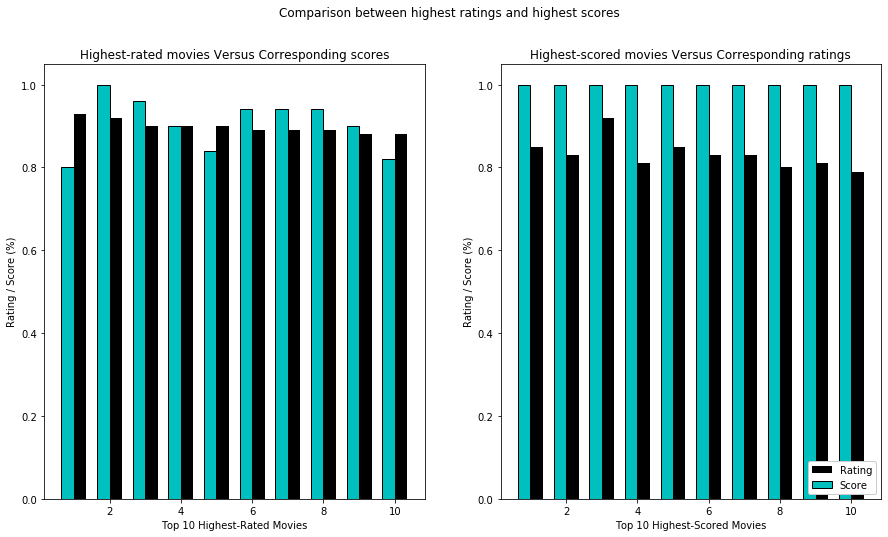

In [22]:
# Compare the top 100 ratings vs top 100 score
num1 = 200
num2 = 10

rating_top100 = review_df.nlargest(num1, 'Rating')
score_top100 = review_df.nlargest(num1, 'Score')

#rating_top100
rating_top100_title = set(rating_top100['Title'])
score_top100_title = set(score_top100['Title'])
 
review_intersect = rating_top100_title.intersection(score_top100_title)

print('Out of {} movies, {} had both the highest ratings and the highest score.'.format(num1, len(review_intersect)) )

# Compare the top 10 ratings with corresponding scores, and vice versa
rating_top10 = review_df.nlargest(num2, 'Rating')
score_top10 = review_df.nlargest(num2, 'Score')

# To normalize ratings/scores, I will take fraction out of 10 or 100
movie_rating = rating_top10['Title']
rating_rating = rating_top10['Rating']/10
score_rating = rating_top10['Score']/100

movie_score = score_top10['Title']
rating_score = score_top10['Rating']/10
score_score = score_top10['Score']/100

fig, (ax1, ax2) = plt.subplots(1,2)
width = .35
labels = np.arange(1,11)

ax1.bar(labels + width/2, rating_rating, width = width, color = 'k')
ax1.bar(labels - width/2, score_rating, width = width, color = 'c', edgecolor = 'k')
ax2.bar(labels + width/2, rating_score, width = width, color = 'k')
ax2.bar(labels - width/2, score_score, width = width, color = 'c', edgecolor = 'k')

    
plt.suptitle('Comparison between highest ratings and highest scores')
ax1.set_title('Highest-rated movies Versus Corresponding scores')
ax2.set_title('Highest-scored movies Versus Corresponding ratings')
ax1.set_ylabel('Rating / Score (%)')
ax2.set_ylabel('Rating / Score (%)')
ax1.set_xlabel('Top 10 Highest-Rated Movies')
ax2.set_xlabel('Top 10 Highest-Scored Movies')
plt.legend(['Rating', 'Score'], loc = 'lower right', framealpha = 1)
fig.set_figwidth(15)
fig.set_figheight(8)

#fig.savefig('Compare_low_vs_high_ratings_and_scores')

Text(0.5, 1.0, 'Top 10 Scored Movies: Rating vs Score Difference')

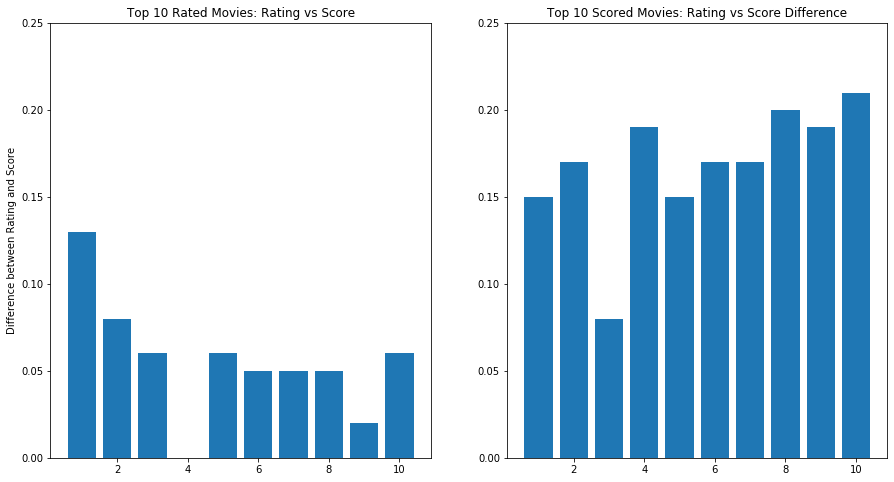

In [121]:
# Compare the difference between rating and score for the 10 highest rated and 10 highest scored movies
rating_compare = abs(rating_rating - score_rating)
score_compare = abs(rating_score - score_score)

# Plot the differences in bar chart
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_figheight(8)
ax1.set_ylim([0,.25])
ax2.set_ylim([0,.25])


labels = np.arange(1,11)

ax1.bar(labels, rating_compare)
ax1.set_title('Top 10 Rated Movies: Rating vs Score')
ax1.set_ylabel('Difference between Rating and Score')

ax2.bar(labels, score_compare)
ax2.set_title('Top 10 Scored Movies: Rating vs Score Difference')




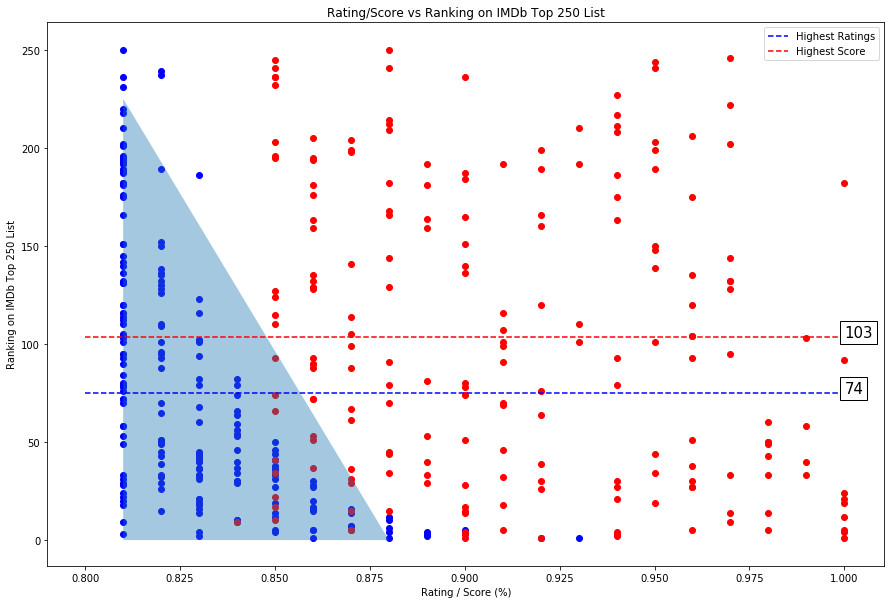

In [23]:
# Plot top 100 scores and top 100 rankings and find the average rankings
ranking_rating100 = rating_top100['Ranking']
rating_rating100 = rating_top100['Rating']/10
avg_rank_rating = np.mean(ranking_rating100)
rank_ratingmat = np.ones(2)*avg_rank_rating

ranking_score100 = score_top100['Ranking']
score_score100 = score_top100['Score']/100
avg_rank_score = np.mean(ranking_score100)
rank_scoremat = np.ones(2)*avg_rank_score

# x values for avg lines
xvals = [.8, 1]

# Values to plot a triangular area on bottom left
tri_xvals = [rating_rating100.min(), .88]
tri_yvals = [225, 0]
tri_yvals2 = [0, 0]

fig = plt.figure(figsize=(15,10))
box = dict(facecolor = 'white')

plt.scatter(rating_rating100, ranking_rating100, color = 'b')
plt.scatter(score_score100, ranking_score100, color = 'r')
plt.plot(xvals, rank_ratingmat, color = 'b', linestyle = '--') # avg ranking for highest rated movies - line
plt.plot(xvals, rank_scoremat, color = 'r', linestyle = '--') # avg ranking for highest scored movies - line
plt.text(xvals[1], avg_rank_rating, str(int(avg_rank_rating)), fontsize = 15, bbox = box)
plt.text(xvals[1], avg_rank_score, str(int(avg_rank_score)), fontsize = 15, bbox = box)
plt.fill_between(tri_xvals, tri_yvals, tri_yvals2, alpha = .4)

plt.ylabel('Ranking on IMDb Top 250 List')
plt.xlabel('Rating / Score (%)')
plt.title('Rating/Score vs Ranking on IMDb Top 250 List')
plt.legend(['Highest Ratings', 'Highest Score'])

#fig.savefig('Rankings_of_highest_ratings_and_scores')

<a id='votes'></a>
## Votes

In [24]:
# Drop N/A Vote values and duplicate Title entries
vote_temp = imdb_df[imdb_df['Votes'].isnull() == False]

# List all movies
movielist = list(gross_imdb['Title'].drop_duplicates())
# Initialize data frame 
vote_df = pd.DataFrame()

# Drop any duplicate title rows and create a workable data frame
for movie in movielist:
    movie_temp = vote_temp[ vote_temp['Title'] == movie]
    movie_temp = movie_temp[ movie_temp['Ranking'] == movie_temp['Ranking'].min()].head(1)
    # head(1) ensures only one entry

    vote_df = pd.concat( [vote_df, movie_temp])

print('There are {} total movies with Vote values.'.format(len(vote_df)))
print('This should match the count in the Vote column below')

vote_df.sort_values('Votes', ascending=False, inplace=True)
vote_df.describe()

There are 633 total movies with Vote values.
This should match the count in the Vote column below


,Ranking,IMDByear,Date,RunTime,Rating,Score,Votes,Gross
count,633.000000,633.000000,633.000000,633.000000,633.000000,532.000000,6.330000e+02,633.000000
mean,128.048973,2003.631912,1988.984202,123.969984,7.890679,80.703008,3.440350e+05,69.900379
std,73.970353,7.821105,21.101692,28.370805,0.445219,10.034505,3.848153e+05,112.056291
min,1.000000,1996.000000,1921.000000,45.000000,5.500000,61.000000,9.401000e+03,0.010000
25%,64.000000,1997.000000,1980.000000,104.000000,7.600000,73.000000,7.662900e+04,5.380000
50%,132.000000,2000.000000,1995.000000,120.000000,8.000000,80.000000,1.818010e+05,25.810000
75%,192.000000,2009.000000,2003.000000,137.000000,8.100000,88.000000,5.088690e+05,86.300000
max,250.000000,2020.000000,2019.000000,242.000000,9.300000,100.000000,2.407245e+06,936.660000


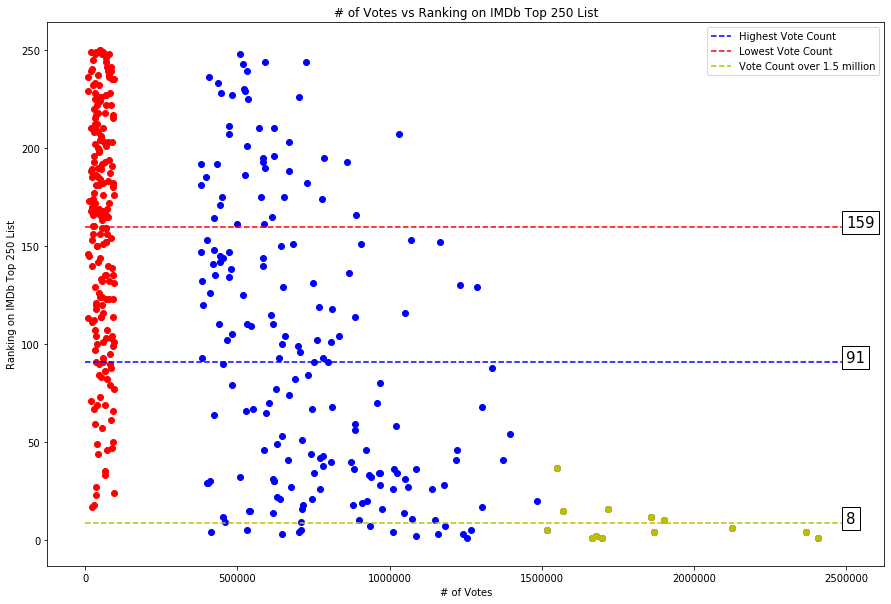

In [25]:
# Plot the top 100 movies against the bottom 100 in terms of votes
num = 200
vote_topnum = vote_df.nlargest(num, 'Votes')
vote_botnum = vote_df.nsmallest(num, 'Votes')

votes_top, rank_top = list(vote_topnum['Votes']), list(vote_topnum['Ranking'])
votes_bot, rank_bot = list(vote_botnum['Votes']), list(vote_botnum['Ranking'])
avgrank_top = np.mean(rank_top)
avgrank_topmat = np.ones(2) * avgrank_top
avgrank_bot = np.mean(rank_bot)
avgrank_botmat = np.ones(2) * avgrank_bot
xvals = [0, 2500000]

# Highlight the values where vote count is over 1.5 million total
vote_df_highest = vote_topnum[ vote_topnum['Votes'] > 1500000]
votes_highest, rank_highest = list(vote_df_highest['Votes']), list(vote_df_highest['Ranking'])
avgrank_highest = np.mean(rank_highest)
avgrank_highestmat = np.ones(2) * avgrank_highest

fig = plt.figure(figsize=(15,10))
box = dict(facecolor = 'white')

plt.scatter(votes_top, rank_top, color = 'b')
plt.scatter(votes_bot, rank_bot, color = 'r')
plt.scatter(votes_highest, rank_highest, color = 'y')
plt.plot(xvals, avgrank_topmat, color = 'b', linestyle = '--')
plt.plot(xvals, avgrank_botmat, color = 'r', linestyle = '--')
plt.plot(xvals, avgrank_highestmat, color = 'y', linestyle = '--')
plt.text(xvals[1], avgrank_top, str(int(avgrank_top)), fontsize = 15, bbox = box)
plt.text(xvals[1], avgrank_bot, str(int(avgrank_bot)), fontsize = 15, bbox = box)
plt.text(xvals[1], avgrank_highest, str(int(avgrank_highest)), fontsize = 15, bbox = box)

plt.ylabel('Ranking on IMDb Top 250 List')
plt.xlabel('# of Votes')
plt.title('# of Votes vs Ranking on IMDb Top 250 List')
plt.legend(['Highest Vote Count', 'Lowest Vote Count', 'Vote Count over 1.5 million'])

#fig.savefig('Votes_vs_ranking')

<a id='people'></a>

# Actors and Directors

Now, I shift focus from exploring which features make a popular movie to exploring which actors and directors have had the most successful careers in the recent decades. For this analysis, the metric of success is to have the most movies on the top 250 lists overall. I also took a look at who had the most movies on the top 10 lists specifically

<a id='actors'></a>

## Actors

In [26]:
# List all movies
movielist = list(gross_imdb['Title'].drop_duplicates())
print('There are {} unique movies in the data set'.format(len(movielist)))

# Initialize data frame 
people_df = pd.DataFrame()

# Drop any duplicate title rows and create a workable data frame
for movie in movielist:
    movie_temp = imdb_df[ imdb_df['Title'] == movie]
    movie_temp = movie_temp[ movie_temp['Ranking'] == movie_temp['Ranking'].min()].head(1)
    # head(1) ensures only one entry (The movie's best ranking)
 
    people_df = pd.concat( [people_df, movie_temp])

 
    # all_cast contains all actors in corresponding Cast# columns
all_cast = pd.concat([ people_df[['Cast1']] , people_df[['Cast2']], people_df[['Cast3']], people_df[['Cast4']] ], axis=1 )
    
# combined_cast consolidates all actors into one column
combined_cast = all_cast.melt().copy()

# remove any white spaces in the strings
for i, actor in enumerate(combined_cast['value']):
    temp_actor = actor.lstrip()
    temp_actor = actor.rstrip()
    
    combined_cast.loc[i, 'value'] = temp_actor
    
# cast_counts includes all actors in one column and how many movies from the top 250 lists they were featured on another
combined_cast.rename(columns = {'variable':'Cast', 'value':'Actors'}, inplace=True)
cast_counts = pd.DataFrame(combined_cast['Actors'].value_counts().items()).rename(columns = {0:'Actors', 1:'Count'})

cast_counts


There are 633 unique movies in the data set


,Actors,Count
0,Robert De Niro,10
1,Tom Hanks,9
2,Leonardo DiCaprio,8
3,Johnny Depp,6
4,Aamir Khan,6
...,...,...
1902,Parambrata Chattopadhyay,1
1903,Simon Shepherd,1
1904,Nobuo Kaneko,1
1905,Elena Altieri,1


These actors have worked on the most top 250 movies:

1: Robert De Niro - 10 movies
2: Tom Hanks - 9 movies
3: Leonardo DiCaprio - 8 movies


1907 actors have participated in at least 1 movie

387 actors have participated in at least 2 movies

126 actors have participated in at least 3 movies

28 actors have participated in at least 5 movies



Text(0, 0.5, '# of Films on the IMDb Top 250 lists')

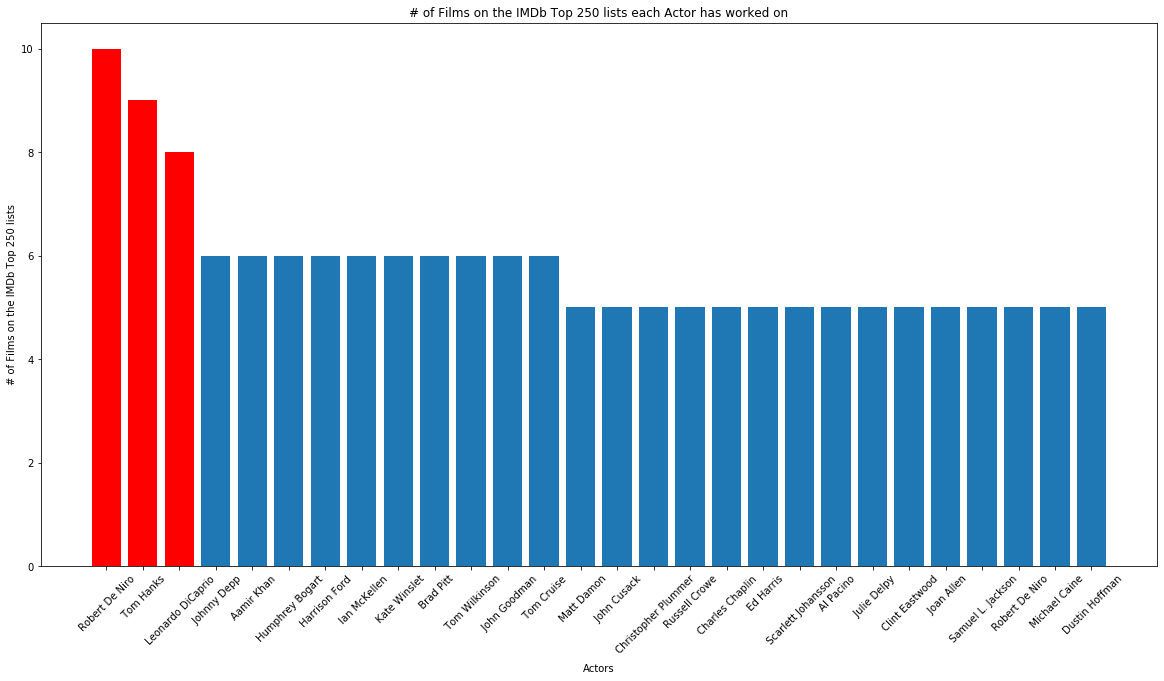

In [27]:
num = 4  # Min. number of movies to appear on the plot
count_val = cast_counts[ cast_counts['Count'] > num ]


# Print the 3 actors with the most movies from the top 250 list
print('These actors have worked on the most top 250 movies:\n')
for i, actor in enumerate(cast_counts['Actors'].head(3)):
    print('{}: {} - {} movies'.format(i + 1, actor.lstrip(), cast_counts.loc[i, 'Count']))

# Print how many actors have worked on 1, 2, 3, and 5 movies
print('\n\n{} actors have participated in at least 1 movie\n'.format(len(cast_counts)))
for i in [2, 3, 5]:
    print('{} actors have participated in at least {} movies\n'.format(len(cast_counts[cast_counts['Count'] >= i]), i))

fig = plt.figure(figsize = (20, 10))
plt.bar(list(count_val['Actors']), list(count_val['Count']))
plt.bar(list(count_val['Actors'].head(3)), list(count_val['Count'].head(3)), color = 'r')
plt.xticks(rotation = 45)
plt.title('# of Films on the IMDb Top 250 lists each Actor has worked on')
plt.xlabel('Actors')
plt.ylabel('# of Films on the IMDb Top 250 lists')

#fig.savefig('Actors_top250_films')

In [28]:
### Repeat, except limit the data to only the top 10s for each year

people_top10 = people_df[ people_df['Ranking'] <= 10].copy()
people_top10

# all_cast contains all actors in corresponding "Cast#" columns
all_cast = pd.concat([ people_top10[['Cast1']] , people_top10[['Cast2']], people_top10[['Cast3']],
                      people_top10[['Cast4']] ], axis=1 )

# combined_cast consolidates all actors into one column
combined_cast = all_cast.melt().copy()

# remove any white spaces in the strings
for i, actor in enumerate(combined_cast['value']):
    temp_actor = actor.lstrip()
    temp_actor = actor.rstrip()
    
    combined_cast.loc[i, 'value'] = temp_actor

# cast_counts includes all actors in one column and how many movies from the top 250 lists they were featured on another
combined_cast.rename(columns = {'variable':'Cast', 'value':'Actors'}, inplace=True)
cast_counts = pd.DataFrame(combined_cast['Actors'].value_counts().items()).rename(columns = {0:'Actors', 1:'Count'})

cast_counts

,Actors,Count
0,Elijah Wood,3
1,Ian McKellen,3
2,Orlando Bloom,3
3,Harrison Ford,2
4,Diane Keaton,2
...,...,...
94,Samuel L. Jackson,1
95,Meat Loaf,1
96,Edward Norton,1
97,Gabriel Byrne,1


These actors have worked on the most top 10 movies:

1: Elijah Wood - 3 movies
2: Ian McKellen - 3 movies
3: Orlando Bloom - 3 movies


99 actors have participated in at least 1 movie

10 actors have participated in at least 2 movies

3 actors have participated in at least 3 movies



Text(0, 0.5, '# of Films on the IMDb Top 10 lists')

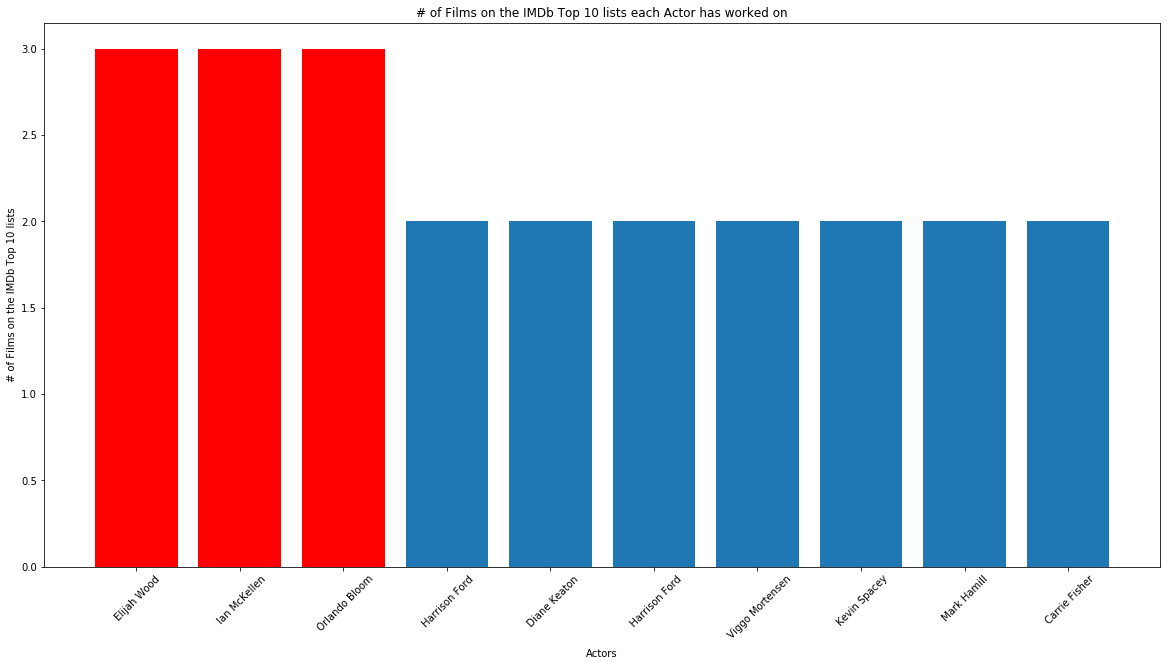

In [29]:
num = 0  #Cut off for the plot
count_val = cast_counts[ cast_counts['Count'] > num ]

print('These actors have worked on the most top 10 movies:\n')

for i, actor in enumerate(cast_counts['Actors'].head(3)):
    print('{}: {} - {} movies'.format(i + 1, actor.lstrip(), cast_counts.loc[i, 'Count']))

print('\n\n{} actors have participated in at least 1 movie\n'.format(len(cast_counts)))

for i in [2, 3]:
    print('{} actors have participated in at least {} movies\n'.format(len(cast_counts[cast_counts['Count'] >= i]), i))

fig = plt.figure(figsize = (20, 10))
plt.bar(list(count_val['Actors'].head(10)), list(count_val['Count'].head(10)))
plt.bar(list(count_val['Actors'].head(3)), list(count_val['Count'].head(3)), color = 'r')
plt.xticks(rotation = 45)
plt.title('# of Films on the IMDb Top 10 lists each Actor has worked on')
plt.xlabel('Actors')
plt.ylabel('# of Films on the IMDb Top 10 lists')

#fig.savefig('Actors_top10_films')

<a id='directors'></a>

## Directors

In [30]:
# Create data frame of directors and respective counts

# all_cast contains all actors in corresponding "Cast#" columns
directors_250 = people_df['Director'].copy()

# remove any white spaces in the strings
for i, director in enumerate(directors_250):
    temp_director = director.lstrip()
    temp_director = director.rstrip()
    
    directors_250[i] = temp_director

directors_10 = people_df[ people_df['Ranking'] <= 10].copy().Director

# remove any white spaces in the strings
for i, director in enumerate(directors_10):
    temp_director = director.lstrip()
    temp_director = director.rstrip()
    
    directors_10[i] = temp_director

# cast_counts includes all actors in one column and how many movies from the top 250 lists they were featured on another
dir_counts = pd.DataFrame(directors_250.value_counts().items()).rename(columns = {0:'Directors', 1:'Count'})

dir_counts

,Directors,Count
0,Steven Spielberg,17
1,Christopher Nolan,16
2,Martin Scorsese,16
3,Alfred Hitchcock,12
4,Clint Eastwood,12
...,...,...
374,Jim Sharman,1
375,Martha Coolidge,1
376,Robert Redford,1
377,Savage Steve Holland,1


These directors have worked on at least 10 movies that made the IMDb Top 250 lists:

1: Steven Spielberg - 17 movies
2: Christopher Nolan - 16 movies
3: Martin Scorsese - 16 movies
4: Alfred Hitchcock - 12 movies
5: Clint Eastwood - 12 movies
6: Peter Jackson - 12 movies
7: Billy Wilder - 12 movies
8: Quentin Tarantino - 11 movies
9: David Fincher - 11 movies
10: Hayao Miyazaki - 10 movies
11: Sergio Leone - 10 movies
12: Stanley Kubrick - 10 movies


379 directors have participated in at least 1 movie

290 directors have participated in at least 2 movies

106 directors have participated in at least 3 movies



<function matplotlib.pyplot.show(*args, **kw)>

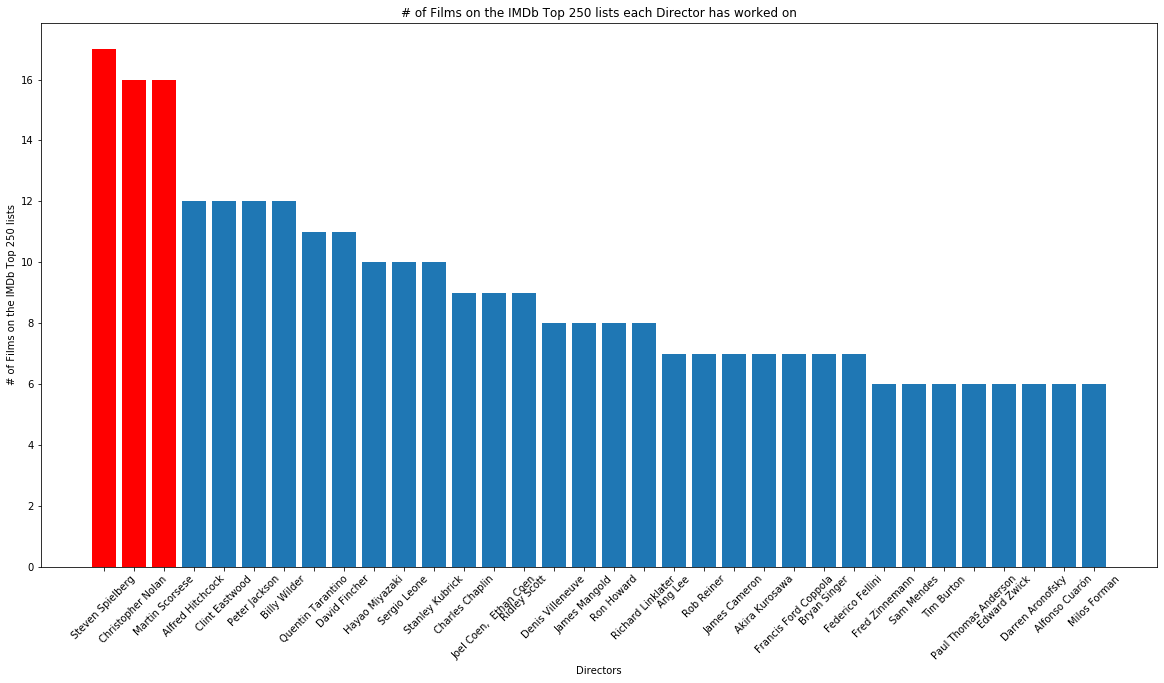

In [31]:
num = 5  #Cut off # of movies for the plot
count_val = dir_counts[ dir_counts['Count'] > num ]

print('These directors have worked on at least 10 movies that made the IMDb Top 250 lists:\n')

for i, director in enumerate(dir_counts[ dir_counts['Count'] >= 10 ].Directors):
    print('{}: {} - {} movies'.format(i + 1, director, dir_counts.loc[i, 'Count']))

print('\n\n{} directors have participated in at least 1 movie\n'.format(len(dir_counts)))

for i in [2, 3]:
    print('{} directors have participated in at least {} movies\n'.format(len(dir_counts[dir_counts['Count'] >= i]), i))

fig = plt.figure(figsize = (20, 10))
plt.bar(list(count_val['Directors']), list(count_val['Count']))
plt.bar(list(count_val['Directors'].head(3)), list(count_val['Count'].head(3)), color = 'r')
plt.xticks(rotation = 45)
plt.title('# of Films on the IMDb Top 250 lists each Director has worked on')
plt.xlabel('Directors')
plt.ylabel('# of Films on the IMDb Top 250 lists')

plt.show

#fig.savefig('Directors_top250_films')

In [32]:
# Same analysis but for the top 10 movies
dir10_counts = pd.DataFrame(directors_10.value_counts().items()).rename(columns = {0:'Directors', 1:'Count'})

dir10_counts

,Directors,Count
0,Steven Spielberg,6
1,Peter Jackson,6
2,Christopher Nolan,6
3,Francis Ford Coppola,4
4,Quentin Tarantino,2
5,Orson Welles,2
6,Irvin Kershner,2
7,David Fincher,2
8,Stanley Kubrick,2
9,Sergio Leone,2


These directors have worked on the most top 10 movies:

1: Steven Spielberg - 6 movies
2: Peter Jackson - 6 movies
3: Christopher Nolan - 6 movies
4: Francis Ford Coppola - 4 movies
5: Quentin Tarantino - 2 movies


21 directors have participated in at least 1 movie

16 directors have participated in at least 2 movies

4 directors have participated in at least 3 movies



<function matplotlib.pyplot.show(*args, **kw)>

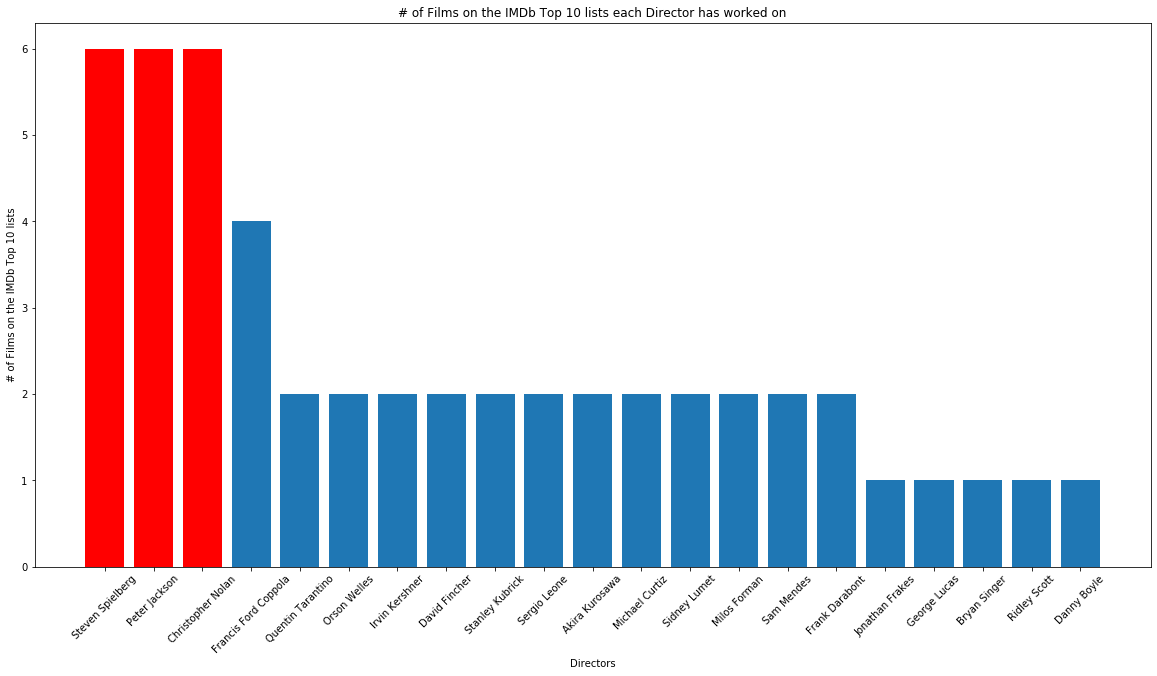

In [33]:
num = 0  #Cut off for the plot
count_val = dir10_counts[ dir10_counts['Count'] > num ]

print('These directors have worked on the most top 10 movies:\n')

for i, director in enumerate(dir10_counts['Directors'].head(5)):
    print('{}: {} - {} movies'.format(i + 1, director, dir10_counts.loc[i, 'Count']))

print('\n\n{} directors have participated in at least 1 movie\n'.format(len(dir10_counts)))

for i in [2, 3]:
    print('{} directors have participated in at least {} movies\n'.format(len(dir10_counts[dir10_counts['Count']>=i]), i))

fig = plt.figure(figsize = (20, 10))
plt.bar(list(count_val['Directors']), list(count_val['Count']))
plt.bar(list(count_val['Directors'].head(3)), list(count_val['Count'].head(3)), color = 'r')
plt.xticks(rotation = 45)
plt.title('# of Films on the IMDb Top 10 lists each Director has worked on')
plt.xlabel('Directors')
plt.ylabel('# of Films on the IMDb Top 10 lists')

plt.show

#fig.savefig('Directors_top_10')

<a id='ML'></a>

# Machine Learning

The second part of this analysis is to build machine learning models to see if the dataset is sufficient enough to predict the rankings of any given movie on the IMDb top 250 lists. For this analysis, I decided to use decision trees, random forests, and SVMs. I would compare the accuracy, precision, recall, F1 scores, and execution times to determine which model performed the best, assuming that I can get a working model at all.

In [34]:
!pip install graphviz
import graphviz

from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
 
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#To time how fast the model performs the job
import time

print('\n# of unique values in each column\n{}\n'.format(imdb_df.nunique()))
print('# of N/A values in each column\n{}\n'.format(imdb_df.isna().sum()))


# of unique values in each column
Ranking     250
IMDByear     25
IMDBlink    733
Title       732
Date        100
RunTime     140
Genre       197
Rating       31
Score        40
Votes       733
Gross       583
Director    428
Cast1       477
Cast2       623
Cast3       656
Cast4       690
dtype: int64

# of N/A values in each column
Ranking       0
IMDByear      0
IMDBlink      0
Title         0
Date          0
RunTime       0
Genre         0
Rating        0
Score       851
Votes         0
Gross       785
Director      0
Cast1         0
Cast2         0
Cast3         8
Cast4         8
dtype: int64



As we can see above, the Score and Gross columns each have hundreds of N/A values. Considering the subjectivity of what makes a movie popular as well as the high variance in either column, it wouldn't be suitable to try to fill in this values (like with the mean for other movies of the same ranking). Both features are possibly important for the model as well, so instead of dropping the features themselves, I will just drop any instances with N/A values in either column. Cast3 and Cast4 also has 8 N/A values each, and dropping those instances will have much less of an effect.

I will regularize the Ratings and Score models to be decimals between 0 and 1 to make their influence more equal as both are scoring systems, just one different scales.

I will scale the Votes and Gross columns as the range for both features is huge. To keep the process simply, I will just do a simple scaling where I subtract the mean from each value and divide by the range. This should scale each column to only contain values between -1 and 1

I will drop the Title and Link columns as both act as id columns and will not be useful.

Finally, sklearn requires categorical data to be converted to numeric. I will use one hot encoder to encode the Director and Cast1 columns.

For the Genre columns specifically, I will create a column for each genre and mark any movies with that associated genre with 1, and a 0 otherwise. This would be better done separately as some movies have up to 3 genres which the encoder would likely treat as a unique genre rather than a combination of 3 existing genres.

Cast1 mainly contains the lead actor/actress while the other cast columns tend to be supporting roles. Each column has hundreds of values that would inundate the model, so it would be better to simply cut those columns entirely.

To also aid in reducing the amount of features, I will take the top 50 values Director, and Cast1 columns and drop other values. For the Genre column, I will only take the top 20 as there are only 23 total as calculated earlier.

For all columns with nominal string values, I will run lstrip() and rstrip() to delete any white spaces that would differentiate otherwise identical strings (ex: in the previous Director analysis, before running lstrip()/rstrip(), Steven Spielberg appeared to only have 10 movies, but he actually had 16)


Regarding the classes, I suspect having 250 possible classes will make the model very inaccurate. To handle this, I will create one class vector y with the original values, then one called y_binned that will contain bins of equal size. I will use 5 bins which contain 50 classes each. This number is chosen arbitrarily

In [35]:
### Functions that will be used in the pre-processing

def feature_scale(feature_arr):
    # Scales an inputted feature array by subtracting the mean and dividing by the range
    feature_range = max(feature_arr) - min(feature_arr)
    feature_mean = np.mean(feature_arr)

    output = feature_arr.copy()

    for i,feature in enumerate(feature_arr):
        output[i] = (feature - feature_mean) / feature_range

    return output

def cut_values(feature_df, cut_num = 0):
    #feature_df is the columns of the encoded feature; cut_num is the desired number of columns
    #output is a list of values to drop, or empty list if cut_num is 0 or not supplied
    
    if cut_num > 0:
        colnum = len(feature_df.columns)
        return list(feature_df.apply(sum).nsmallest(colnum - cut_num).index)
    else:
        if cut_num < 0:
            print('Error: Invalid cut number, returning an empty list')
        return list()


def white_strip(column_list):
    # remove any white spaces in the string values from a list; outputs a new 
    for i, value in enumerate(column_list):
        tempval = value.lstrip()
        tempval = value.rstrip()

        column_list[i] = tempval
        
    return column_list

In [36]:
# View the original data frame
imdb_df

,Ranking,IMDByear,IMDBlink,Title,Date,RunTime,Genre,Rating,Score,Votes,Gross,Director,Cast1,Cast2,Cast3,Cast4
0,1,1996,/title/tt0076759/,Star Wars,1977,121,"Action, Adventure, Fantasy",8.6,90.0,1254781,322.74,George Lucas,Mark Hamill,Harrison Ford,Carrie Fisher,Alec Guinness
1,2,1996,/title/tt0111161/,The Shawshank Redemption,1994,142,Drama,9.3,80.0,2407245,28.34,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
2,3,1996,/title/tt0117951/,Trainspotting,1996,93,Drama,8.1,83.0,645186,16.50,Danny Boyle,Ewan McGregor,Ewen Bremner,Jonny Lee Miller,Kevin McKidd
3,4,1996,/title/tt0114814/,The Usual Suspects,1995,106,"Crime, Mystery, Thriller",8.5,77.0,1010775,23.34,Bryan Singer,Kevin Spacey,Gabriel Byrne,Chazz Palminteri,Stephen Baldwin
4,5,1996,/title/tt0108598/,The Wrong Trousers,1993,30,"Animation, Short, Comedy",8.3,NaN,51747,NaN,Nick Park,Peter Sallis,Peter Hawkins,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,246,2020,/title/tt1454029/,The Help,2011,146,Drama,8.0,62.0,434956,169.71,Tate Taylor,Emma Stone,Viola Davis,Octavia Spencer,Bryce Dallas Howard
6246,247,2020,/title/tt0093779/,The Princess Bride,1987,98,"Adventure, Family, Fantasy",8.1,77.0,400081,30.86,Rob Reiner,Cary Elwes,Mandy Patinkin,Robin Wright,Chris Sarandon
6247,248,2020,/title/tt0058946/,La battaglia di Algeri,1966,121,"Drama, War",8.1,96.0,54799,0.06,Gillo Pontecorvo,Brahim Hadjadj,Jean Martin,Yacef Saadi,Samia Kerbash
6248,249,2020,/title/tt2991224/,Mandariinid,2013,87,"Drama, War",8.2,73.0,42748,0.14,Zaza Urushadze,Lembit Ulfsak,Elmo Nüganen,Giorgi Nakashidze,Misha Meskhi


## Pre-processing the data

In [37]:
### PRE-PROCESSING THE DATA

genre_MLnum = 15
Cast1_MLnum = 50
people_MLnum = 25

### sklearn requires encoding categorical variables to numbers

imdb_ml_df = imdb_df.copy()

########## Title/Link and NA rows dropped
imdb_dat = imdb_ml_df.drop(['IMDBlink', 'Title'], axis=1).dropna().copy()
#imdb_dat_with_people = imdb_dat.copy()

########## Drop Cast2, Cast3, and Cast4 columns
#imdb_dat = imdb_dat.drop(['Cast2', 'Cast3', 'Cast4'], axis=1).copy()

########## Regularize the Ratings and Score columns
imdb_dat['Rating'] = imdb_dat['Rating'].apply(lambda x : x / 10)
imdb_dat['Score'] = imdb_dat['Score'].apply(lambda x : x / 100)

########## Scale the Votes and Gross columns
imdb_dat['Votes'] = feature_scale(list(imdb_dat['Votes']))
imdb_dat['Gross'] = feature_scale(list(imdb_dat['Gross']))

    
    
########## Split the genre column into binary columns
genre_series = list(imdb_dat['Genre'])

# genre_num: df of genres; index contains dramas, column contains an index number for each drama
# genre_list is from the earlier analysis on genres
genre_num = pd.DataFrame(genre_list).reset_index().copy().reset_index().set_index('Genre').copy()
genre_num = genre_num.drop('index', axis=1).rename(columns = {'level_0':'genre_index'})

# Initialize array where columns are the genres, rows track which genres a movie is using
genre_count = np.zeros((len(genre_series), len(genre_list)))

for i, instance in enumerate(genre_series):
    instance = instance.split(', ')
 
    for individual_genre in instance:
        individual_genre.lstrip()
        individual_genre.rstrip()

        # Update the value in the genre's column in the instance's row of genre_count
        #print(i, genre_num.loc[individual_genre, 'genre_index'])
        genre_count[i, genre_num.loc[individual_genre, 'genre_index']] = 1


# Convert genre_count to df, concat with imdb_gensplit_df, delete original genre column
genre_counter_df = pd.DataFrame(genre_count)
genre_counter_df.columns = genre_list

# Remove the bottom genres decided by genre_MLnum
cut_genres = cut_values(genre_counter_df, genre_MLnum)

print('These genres will be cut:\n{}\n'.format(cut_genres))
genre_counter_df = genre_counter_df.drop(columns = cut_genres, axis=1)

# Concatenate the original df with the new genre df, drop the original 'Genre' and new 'index' columns
imdb_dat = pd.concat( [imdb_dat.reset_index(), genre_counter_df.reset_index()], axis=1)
imdb_dat = imdb_dat.drop(['Genre', 'index'], axis=1)


########## Encode the Director and Cast1 columns
ohe = preprocessing.OneHotEncoder(sparse = False)
col_strings = ['Director', 'Cast1', 'Cast2', 'Cast3', 'Cast4']

# Delete white spaces in people columns
for col_name in col_strings:
    imdb_dat[col_name] = white_strip(list(imdb_dat[col_name]))

director_df = pd.DataFrame(ohe.fit_transform(imdb_dat[['Director']]))
cast1_df = pd.DataFrame(ohe.fit_transform(imdb_dat[['Cast1']]))
cast2_df = pd.DataFrame(ohe.fit_transform(imdb_dat[['Cast2']]))
cast3_df = pd.DataFrame(ohe.fit_transform(imdb_dat[['Cast3']]))
cast4_df = pd.DataFrame(ohe.fit_transform(imdb_dat[['Cast4']]))

cut_directors = cut_values(director_df, people_MLnum)
cut_cast1 = cut_values(cast1_df, Cast1_MLnum)
cut_cast2 = cut_values(cast2_df, people_MLnum)
cut_cast3 = cut_values(cast3_df, people_MLnum)
cut_cast4 = cut_values(cast4_df, people_MLnum)


print('{} out of {} values in the {} column will be dropped'.format(len(cut_directors), len(director_df.columns), 'Directors'))
print('{} out of {} values in the {} column will be dropped'.format(len(cut_cast1), len(cast1_df.columns), 'Cast1'))
print('{} out of {} values in the {} column will be dropped'.format(len(cut_cast2), len(cast2_df.columns), 'Cast2'))
print('{} out of {} values in the {} column will be dropped'.format(len(cut_cast3), len(cast3_df.columns), 'Cast3'))
print('{} out of {} values in the {} column will be dropped'.format(len(cut_cast4), len(cast4_df.columns), 'Cast4'))

director_df = director_df.drop(columns = cut_directors, axis=1)
cast1_df = cast1_df.drop(columns = cut_cast1, axis=1)
cast2_df = cast2_df.drop(columns = cut_cast2, axis=1)
cast3_df = cast3_df.drop(columns = cut_cast3, axis=1)
cast4_df = cast4_df.drop(columns = cut_cast4, axis=1)

# Concatenate the original df with the new Director df, drop the original 'Director' column
imdb_dat = pd.concat( [imdb_dat.reset_index(), director_df.reset_index()], axis=1)
imdb_dat = imdb_dat.drop(columns = ['Director', 'index'], axis=1)

# Concatenate the original df with the new Cast1 df, drop the original 'Cast1' column
imdb_dat = pd.concat( [imdb_dat.reset_index(), cast1_df.reset_index()], axis=1)
imdb_dat = imdb_dat.drop(columns = ['Cast1', 'index'], axis=1)

# Concatenate the original df with the new Cast2 df, drop the original 'Cast1' column
imdb_dat = pd.concat( [imdb_dat.reset_index(), cast2_df.reset_index()], axis=1)
imdb_dat = imdb_dat.drop(columns = ['Cast2', 'index'], axis=1)

# Concatenate the original df with the new Cast3 df, drop the original 'Cast1' column
imdb_dat = pd.concat( [imdb_dat.reset_index(), cast3_df.reset_index()], axis=1)
imdb_dat = imdb_dat.drop(columns = ['Cast3', 'index'], axis=1)

# Concatenate the original df with the new Cast4 df, drop the original 'Cast1' column
imdb_dat = pd.concat( [imdb_dat.reset_index(), cast4_df.reset_index()], axis=1)
imdb_dat = imdb_dat.drop(columns = ['Cast4', 'index'], axis=1)

imdb_dat


    


These genres will be cut:
['Short', 'Documentary', 'Musical', 'Music', 'Sport', 'Horror', 'Film-Noir', 'Western']

299 out of 324 values in the Directors column will be dropped
311 out of 361 values in the Cast1 column will be dropped
434 out of 459 values in the Cast2 column will be dropped
455 out of 480 values in the Cast3 column will be dropped
477 out of 502 values in the Cast4 column will be dropped


,Ranking,IMDByear,Date,RunTime,Rating,Score,Votes,Gross,Drama,Crime,...,451,455,456,459,462,467,473,477,487,494
0,1,1996,1977,121,0.86,0.90,0.296190,0.264342,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1996,1994,142,0.93,0.80,0.776815,-0.049969,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,1996,1996,93,0.81,0.83,0.041964,-0.062610,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1996,1995,106,0.85,0.77,0.194430,-0.055307,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,1996,1996,111,0.76,0.71,-0.177211,0.017996,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4888,246,2020,2011,146,0.80,0.62,-0.045711,0.100962,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4889,247,2020,1987,98,0.81,0.77,-0.060255,-0.047279,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4890,248,2020,1966,121,0.81,0.96,-0.204252,-0.080162,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4891,249,2020,2013,87,0.82,0.73,-0.209278,-0.080077,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Initializing the models and binning the classes

In [38]:
### Build the data set inputs for the ML models and assign the models

seed = 15
binnum = 5
bintop10 = [1, 10, 50, 100, 250]

#Extract the class column
y = imdb_dat.Ranking
#Extract the data columns
X = imdb_dat.drop('Ranking', axis=1)

#Create the train/test data split, 70% split, random state creates a seed for reproducibility
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3, random_state = seed)
############################Version with class bins
y_binned = pd.cut(y, bins = binnum, right=True, include_lowest=True, labels = range(1,binnum + 1))
Xbin_train, Xbin_test, ybin_train, ybin_test = train_test_split(X, y_binned, test_size=0.3, random_state = seed)
############################Version with top 10, 10-50, 50-100, 100-250 bin ranges
y_binnedtop10 = pd.cut(y, bins = bintop10, right=True, include_lowest=True, labels = range(1,len(bintop10)))
Xbintop10_train, Xbintop10_test, ybintop10_train, ybintop10_test = train_test_split(X, y_binnedtop10, test_size=0.3, random_state = seed)

# Initialize models
decision_tree = tree.DecisionTreeClassifier(random_state = seed)

decision_tree_bins = tree.DecisionTreeClassifier(random_state = seed)
random_forest_bins = RandomForestClassifier(random_state = seed)

decision_tree_top10 = tree.DecisionTreeClassifier(random_state = seed)
random_forest_top10 = RandomForestClassifier(random_state = seed)

# View the change in class for the binned y column
classes = ['{} -> {}'.format(i, j) for i, j in zip(y, y_binned)]
print('Original class to ({}-class) bin for all instance\'s classes\n'.format(binnum))

for i, classval in enumerate(classes):
    print('Instance {}: {}'.format(i, classval))

Original class to (5-class) bin for all instance's classes

Instance 0: 1 -> 1
Instance 1: 2 -> 1
Instance 2: 3 -> 1
Instance 3: 4 -> 1
Instance 4: 7 -> 1
Instance 5: 8 -> 1
Instance 6: 9 -> 1
Instance 7: 10 -> 1
Instance 8: 11 -> 1
Instance 9: 12 -> 1
Instance 10: 13 -> 1
Instance 11: 14 -> 1
Instance 12: 15 -> 1
Instance 13: 16 -> 1
Instance 14: 18 -> 1
Instance 15: 19 -> 1
Instance 16: 20 -> 1
Instance 17: 22 -> 1
Instance 18: 23 -> 1
Instance 19: 24 -> 1
Instance 20: 25 -> 1
Instance 21: 26 -> 1
Instance 22: 28 -> 1
Instance 23: 29 -> 1
Instance 24: 30 -> 1
Instance 25: 31 -> 1
Instance 26: 32 -> 1
Instance 27: 33 -> 1
Instance 28: 34 -> 1
Instance 29: 35 -> 1
Instance 30: 36 -> 1
Instance 31: 37 -> 1
Instance 32: 38 -> 1
Instance 33: 39 -> 1
Instance 34: 40 -> 1
Instance 35: 41 -> 1
Instance 36: 42 -> 1
Instance 37: 44 -> 1
Instance 38: 45 -> 1
Instance 39: 46 -> 1
Instance 40: 48 -> 1
Instance 41: 50 -> 1
Instance 42: 52 -> 2
Instance 43: 53 -> 2
Instance 44: 54 -> 2
Instance 45:

## Defining useful functions to compare model results

In [39]:
# Prints useful ML stats given the test instance classes and the predicted instance classes
def ml_stats(y_test, y_pred):
    print('Confusion Matrix:\n')
    
    conmat = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    classreport = classification_report(y_test, y_pred)
    
    print(conmat, '\n\n')
    print('Accuracy Score:\n{}\n\n'.format(acc))
    print('Classification Report Score:\n{}\n\n'.format(classreport))
    
    
# Similar to ml_stats, but gives the returns all outputs instead of printing them
def ml_stats_outputs(y_test, y_pred):
    conmat = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    classreport = classification_report(y_test, y_pred, output_dict = True)
    
    return conmat, acc, classreport
    

# Prints out stats comparing accuracy, precision, recall, f1, and gives model with best stats in each               
def ml_comparison(y_list, models, time_list = -1):
    #y_list is a list of lists; each sublist consists of test y values and predicted y values
    #models is a list of the models used (as strings, ex: 'Decision Tree')
    ######ml_stats_outputs is redefined here as an inner function in case I want to use this again in the future :)
    if len(y_list) != len(models):
        print('Error: {} pairs of y_test/y_pred values, but only {} models given'.format(len(y_list), len(models)))
        
    else: 
        #Define ml_stats_outputs() so this function can stand alone
        ####################################################
        def _ml_stats_outputs2(y_test, y_pred):
            acc = accuracy_score(y_test, y_pred)
            classreport = classification_report(y_test, y_pred, output_dict = True)
    
            return acc, classreport
        ####################################################
        #Extract all y values
        #[ [y1_test, y1_pred], [y2_test, y2_pred], [y3_test, y3_pred] ] = y_list
        ml_stats_list = list()
        
        #Get the ML stat outputs for all models
        for i in range(0, len(models)):
            accuracy, classification = _ml_stats_outputs2(y_list[i][0], y_list[i][1])
            
            ml_stats_list.append([accuracy, classification])
            
      
        #Extract and print accuracy values; Extract precision, recall, f1 average scores from classification dictionaries
        #Also track the best models in each category
        compare_type = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
        best_models_index = [0, 0, 0, 0]
        best_model_counter = [0, 0, 0, 0]
        
        for i, compare in enumerate(compare_type):
            print('{} Comparison\n'.format(compare))
            
            best = 0
            
            for j,model in enumerate(models):
                if compare == 'Accuracy':
                    model_acc = ml_stats_list[j][0] * 100
                    print('{}: {:.5F}%'.format(model, model_acc))
                    
                    # Record the first accuracy; if any subsequent accuracies are higher, 
                    if model_acc > best:
                        best_models_index[i] = j
                        best = model_acc
                            
                    
                else:
                    ml_stats_dict = ml_stats_list[j][1]
                    prec_rec_f1_support = list(ml_stats_dict['weighted avg'].values())
                    
                    print('{}: {:.5F}'.format(model, prec_rec_f1_support[i-1]))
                    
                    if prec_rec_f1_support[i-1] > best:
                        best_models_index[i] = j
                        best = prec_rec_f1_support[i-1]
            print('\n')
            
            #Record which model did the best in the comparison type
            best_model_counter[best_models_index[i]] = best_model_counter[best_models_index[i]] + 1
            
        #### MAKE A COMPARISON FOR EXECUTION TIMES HERE
        #Default time
        #best_model_time = 0
        
        if time_list != -1:
            if len(time_list) != len(models):
                print('{} models but {} time values submitted to the function\n'.format(len(models), len(time_list)))
                      
            else:
                compare_type.append('Execution Time')
                
                #Default  to the first time/model/index, these will be updated if better ones are found
                best_model_TIME = time_list[0]
                best_i_TIME = 0
                
                print('Execution Time Comparison\n')
                
                for i, timelist_models in enumerate(zip(time_list, models)):
                    timeval, time_model = timelist_models
                    
                    print('{}: {:.5F}s'.format(time_model, timeval))
                    
                    if best_model_TIME > timeval:
                        best_model_TIME = timeval
                        best_i_TIME = i
                        
                print('\n')
                
                
                best_models_index.append(best_i_TIME)
                best_model_counter[best_i_TIME] = best_model_counter[best_i_TIME] + 1
        
        #Conclusions
        print('Best model for each category\n')
        for compare, model_num in zip(compare_type, best_models_index):
            print('{}: {}'.format(compare, models[model_num]))
        
        if time_list == -1:
            print('No time values were submitted')
        best_model = best_model_counter.index(max(best_model_counter))
        print('\nBest model overall: {}'.format(models[best_model]))


## Attempting to run a decision tree with 250 classes

In [40]:
############################################ DECISION TREE CODE
start = time.time()

decision_tree.fit(X_train, y_train)
tree_y_pred = decision_tree.predict(X_test)

end = time.time()
tree_exec_time = end-start

ml_stats(y_test, tree_y_pred)


print('Execution time: {}s'.format(tree_exec_time))


Confusion Matrix:

[[2 1 0 ... 0 0 0]
 [1 5 2 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 


Accuracy Score:
0.06471389645776567


Classification Report Score:
              precision    recall  f1-score   support

           1       0.50      0.50      0.50         4
           2       0.71      0.62      0.67         8
           3       0.33      0.22      0.27         9
           4       0.27      0.50      0.35         6
           5       0.62      0.62      0.62         8
           6       0.57      0.67      0.62         6
           7       0.67      0.44      0.53         9
           8       0.40      0.80      0.53         5
           9       0.30      0.43      0.35         7
          10       0.38      0.43      0.40         7
          11       0.33      0.25      0.29         8
          12       1.00      0.10      0.18        10
          13       0.09      0.11      0.10         9
          14       0.10      0.33 

C:\Users\johnt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
# View the tree

#fig = plt.figure(figsize = (225,200))

#output = tree.plot_tree(decision_tree, feature_names=X.columns, class_names=str(y.unique()), filled=True)

#fig.savefig('decision_tree.png')

Overall accuracy was very low at just 6.33%, but looking at the classification report, after about 20th place, many of the rankings simply went unfilled (especially the worst rankings). This means there were too many classes to consider.

To help the model but also preserve some sense of the data, I will bin the classes into 10 bins (out of 250 classes, this means 25 classes per bin). These values were calculated earlier.

<a id='5'></a>

## 5 equal-width bins (1-50, 51-100, 101-150, 151-200, 201-250)

In [42]:
start = time.time()

decision_tree_bins.fit(Xbin_train, ybin_train)
tree_ybin_pred = decision_tree_bins.predict(Xbin_test)

end = time.time()
treebin_exec_time = end-start

ml_stats(ybin_test, tree_ybin_pred)


print('Execution time: {}s'.format(treebin_exec_time))


Confusion Matrix:

[[298  29   5   1   1]
 [ 24 257  33   5   6]
 [  3  41 195  44   5]
 [  1   8  40 145  50]
 [  1   8  15  66 187]] 


Accuracy Score:
0.7370572207084468


Classification Report Score:
              precision    recall  f1-score   support

           1       0.91      0.89      0.90       334
           2       0.75      0.79      0.77       325
           3       0.68      0.68      0.68       288
           4       0.56      0.59      0.57       244
           5       0.75      0.68      0.71       277

    accuracy                           0.74      1468
   macro avg       0.73      0.73      0.73      1468
weighted avg       0.74      0.74      0.74      1468



Execution time: 0.031323909759521484s


In [43]:
# View the tree

#fig = plt.figure(figsize = (175,125))

#output = tree.plot_tree(decision_tree_bins, feature_names=X.columns, class_names=str(y_binned.unique()), filled=True)

#fig.savefig('decision_tree_binned.png')

In [44]:
######################################### RANDOM FORESTS CODE
start = time.time()

random_forest_bins.fit(Xbin_train, ybin_train)
rf_ybin_pred = random_forest_bins.predict(Xbin_test)

end = time.time()
rfbin_exec_time = end-start

ml_stats(ybin_test, rf_ybin_pred)


print('Execution time: {}s'.format(rfbin_exec_time))

Confusion Matrix:

[[310  19   2   2   1]
 [ 28 258  31   7   1]
 [  2  38 201  39   8]
 [  1   7  33 159  44]
 [  1   0   7  74 195]] 


Accuracy Score:
0.7649863760217984


Classification Report Score:
              precision    recall  f1-score   support

           1       0.91      0.93      0.92       334
           2       0.80      0.79      0.80       325
           3       0.73      0.70      0.72       288
           4       0.57      0.65      0.61       244
           5       0.78      0.70      0.74       277

    accuracy                           0.76      1468
   macro avg       0.76      0.76      0.76      1468
weighted avg       0.77      0.76      0.77      1468



Execution time: 0.5459315776824951s


In [45]:
######################################### SVM CODE
svm_model_bins = SVC(kernel = 'rbf', gamma = .0075, C = 1000, random_state = seed)

start = time.time()

svm_model_bins.fit(Xbin_train, ybin_train)
svm_ybin_pred = svm_model_bins.predict(Xbin_test)

end = time.time()
svmbin_exec_time = end-start

ml_stats(ybin_test, svm_ybin_pred)


print('Execution time: {}s'.format(svmbin_exec_time))

Confusion Matrix:

[[312  19   1   1   1]
 [ 26 258  35   4   2]
 [  5  35 201  39   8]
 [  1   7  33 168  35]
 [  6  15  12  61 183]] 


Accuracy Score:
0.7643051771117166


Classification Report Score:
              precision    recall  f1-score   support

           1       0.89      0.93      0.91       334
           2       0.77      0.79      0.78       325
           3       0.71      0.70      0.71       288
           4       0.62      0.69      0.65       244
           5       0.80      0.66      0.72       277

    accuracy                           0.76      1468
   macro avg       0.76      0.76      0.75      1468
weighted avg       0.77      0.76      0.76      1468



Execution time: 2.832831859588623s


In [46]:
# VARIABLES
# ybin_test, tree_ybin_pred
# ybin_test, rf_ybin_pred
# ybin_test, svm_ybin_pred

# VARIABLES
ytree_nobin = [y_test, tree_y_pred]
ytree1 = [ybin_test, tree_ybin_pred]
yrf1 = [ybin_test, rf_ybin_pred]
ysvm1 = [ybin_test, svm_ybin_pred]

y_array = [ytree_nobin, ytree1, yrf1, ysvm1]
models = ['Decision Tree with 250 Classes', 'Decision Tree', 'Random Forest', 'SVM']
time_list = [tree_exec_time, treebin_exec_time, rfbin_exec_time, svmbin_exec_time]

ml_comparison(y_array, models, time_list)




Accuracy Comparison

Decision Tree with 250 Classes: 6.47139%
Decision Tree: 73.70572%
Random Forest: 76.49864%
SVM: 76.43052%


Precision Comparison

Decision Tree with 250 Classes: 0.07760
Decision Tree: 0.74011
Random Forest: 0.76936
SVM: 0.76674


Recall Comparison

Decision Tree with 250 Classes: 0.06471
Decision Tree: 0.73706
Random Forest: 0.76499
SVM: 0.76431


F1 Score Comparison

Decision Tree with 250 Classes: 0.06439
Decision Tree: 0.73795
Random Forest: 0.76615
SVM: 0.76378


Execution Time Comparison

Decision Tree with 250 Classes: 0.08894s
Decision Tree: 0.03132s
Random Forest: 0.54593s
SVM: 2.83283s


Best model for each category

Accuracy: Random Forest
Precision: Random Forest
Recall: Random Forest
F1 Score: Random Forest
Execution Time: Decision Tree

Best model overall: Random Forest


C:\Users\johnt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


With only 5 classes for the models to worry about, all three had greatly improved results. Overall, the random forest model was the best, outperforming all other algorithms on all categories except the execution time (which was to be expected as decision trees are relatively simple algorithms).

<a id='top10'></a>

## Top 10-50-100-250 predictions

In [47]:
#Predict top 10, top 11-50, 51-100, top 101-250
start = time.time()

decision_tree_top10.fit(Xbintop10_train, ybintop10_train)
tree_ybintop10_pred = decision_tree_top10.predict(Xbintop10_test)

end = time.time()
treetop10_exec_time = end-start

ml_stats(ybintop10_test, tree_ybintop10_pred)

print('Execution time: {}s'.format(treetop10_exec_time))

Confusion Matrix:

[[ 59   8   1   1]
 [ 13 218  29   5]
 [  0  29 245  51]
 [  1   6  47 755]] 


Accuracy Score:
0.8698910081743869


Classification Report Score:
              precision    recall  f1-score   support

           1       0.81      0.86      0.83        69
           2       0.84      0.82      0.83       265
           3       0.76      0.75      0.76       325
           4       0.93      0.93      0.93       809

    accuracy                           0.87      1468
   macro avg       0.83      0.84      0.84      1468
weighted avg       0.87      0.87      0.87      1468



Execution time: 0.028963804244995117s


In [48]:
# View the tree

#fig = plt.figure(figsize = (250,200))

#output = tree.plot_tree(decision_tree_top10, feature_names=X.columns, class_names=str(y_binnedtop10.unique()), filled=True)

#fig.savefig('decision_tree_binnedtop10.png')

In [49]:
######################################### RANDOM FORESTS CODE
start = time.time()

random_forest_top10.fit(Xbintop10_train, ybintop10_train)
rf_ybintop10_pred = random_forest_top10.predict(Xbintop10_test)

end = time.time()
rftop10_exec_time = end-start

ml_stats(ybintop10_test, rf_ybintop10_pred)

print('Execution time: {}s'.format(rftop10_exec_time))

Confusion Matrix:

[[ 63   5   0   1]
 [ 12 227  22   4]
 [  0  27 258  40]
 [  0   3  43 763]] 


Accuracy Score:
0.8930517711171662


Classification Report Score:
              precision    recall  f1-score   support

           1       0.84      0.91      0.87        69
           2       0.87      0.86      0.86       265
           3       0.80      0.79      0.80       325
           4       0.94      0.94      0.94       809

    accuracy                           0.89      1468
   macro avg       0.86      0.88      0.87      1468
weighted avg       0.89      0.89      0.89      1468



Execution time: 0.529742956161499s


In [50]:
######################################### SVM CODE
svm_model_top10 = SVC(kernel = 'rbf', gamma = .1, C = 10, random_state = seed)

start = time.time()

svm_model_top10.fit(Xbintop10_train, ybintop10_train)
svm_ybintop10_pred = svm_model_top10.predict(Xbintop10_test)

end = time.time()
svmtop10_exec_time = end-start

ml_stats(ybintop10_test, svm_ybintop10_pred)

print('Execution time: {}s'.format(svmtop10_exec_time))

Confusion Matrix:

[[ 66   2   0   1]
 [ 10 237  15   3]
 [  0  23 259  43]
 [  0   7  47 755]] 


Accuracy Score:
0.8971389645776566


Classification Report Score:
              precision    recall  f1-score   support

           1       0.87      0.96      0.91        69
           2       0.88      0.89      0.89       265
           3       0.81      0.80      0.80       325
           4       0.94      0.93      0.94       809

    accuracy                           0.90      1468
   macro avg       0.87      0.90      0.88      1468
weighted avg       0.90      0.90      0.90      1468



Execution time: 5.069658041000366s


Comparison of stats:

In [51]:
# VARIABLES
ytree2 = [ybintop10_test, tree_ybintop10_pred]
yrf2 = [ybintop10_test, rf_ybintop10_pred]
ysvm2 = [ybintop10_test, svm_ybintop10_pred]

y_array = [ytree2, yrf2, ysvm2]
models = ['Decision Tree', 'Random Forest', 'SVM']
time_list = [treetop10_exec_time, rftop10_exec_time, svmtop10_exec_time]

ml_comparison(y_array, models, time_list)



Accuracy Comparison

Decision Tree: 86.98910%
Random Forest: 89.30518%
SVM: 89.71390%


Precision Comparison

Decision Tree: 0.86962
Random Forest: 0.89312
SVM: 0.89728


Recall Comparison

Decision Tree: 0.86989
Random Forest: 0.89305
SVM: 0.89714


F1 Score Comparison

Decision Tree: 0.86971
Random Forest: 0.89301
SVM: 0.89709


Execution Time Comparison

Decision Tree: 0.02896s
Random Forest: 0.52974s
SVM: 5.06966s


Best model for each category

Accuracy: SVM
Precision: SVM
Recall: SVM
F1 Score: SVM
Execution Time: Decision Tree

Best model overall: SVM
